# Evaluation Project-9

# Insurance Claim Fraud Detection

Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 


Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
# importing all libraries

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore, skew

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

From the given problem statement we have to create a predictive model that predicts if an insurance claim is fraudulent or not.<br>
So this becomes a binary classification problem where "fraud_reported" is our target variable rest all others are feature variables.<br>
Also from the loaded dataset we see  that we have 1000 rows and 40 columns.

# Exploratory Data Analysis(EDA)

In [3]:
df.shape

(1000, 40)

Shape of the dataframe tells 1000rows and 40 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

From the df.info() data we see that we have 2 columns of float64 datatype, 17 columns of int datatype, 21 columns of object datatype.<br>
We can also see that _c39 has all empty rows.So it can be removed.<br>


# Checking null Values

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We got null values only in _c39 columns

<AxesSubplot:>

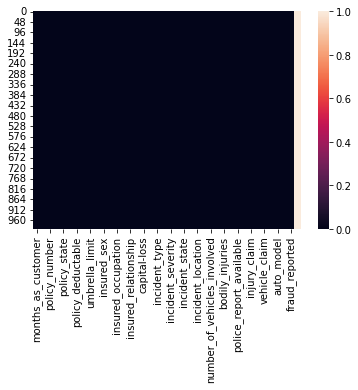

In [6]:
sns.heatmap(df.isnull())

Again checked visually, we see that _c39 is blank column

In [7]:
df.drop('_c39', axis=1, inplace=True)

<AxesSubplot:>

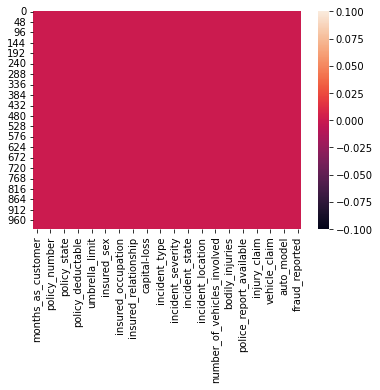

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.shape

(1000, 39)

Hence all null values are removed/treated and new shape of our data is 1000rows and 39 columns

# Checking Duplicates

In [10]:
df.duplicated().sum()

0

We have got no duplicates in our data

# Checking Unique Values and Value Counts

In [11]:
df.nunique().to_frame("Unique values counts")

Unique values counts
months_as_customer                            391
age                                            46
policy_number                                1000
policy_bind_date                              951
policy_state                                    3
policy_csl                                      3
policy_deductable                               3
policy_annual_premium                         991
umbrella_limit                                 11
insured_zip                                   995
insured_sex                                     2
insured_education_level                         7
insured_occupation                             14
insured_hobbies                                20
insured_relationship                            6
capital-gains                                 338
capital-loss                                  354
incident_date                                  60
incident_type                                   4
collision_type                                  4
incident_severity                               4
authorities_contacted                           5
incident_state                                  7
incident_city                                   7
incident_location                            1000
incident_hour_of_the_day                       24
number_of_vehicles_involved                     4
property_damage                                 3
bodily_injuries                                 3
witnesses                                       4
police_report_available                         3
total_claim_amount                            763
injury_claim                                  638
property_claim                                626
vehicle_claim                                 726
auto_make                                      14
auto_model                                     39
auto_year                                      21
fraud_reported                                  2

From above we see that incident_location, policy_number have all unique values and has no considerable effect in predicting fraud_reported, so we can drop these two columns.

In [12]:
df.drop(['policy_number','incident_location'], axis =1, inplace =True )

In [13]:
# To display maximum rows and columns in the dataset
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [14]:
df.head(10)

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       17-10-2014           OH    250/500   
1                 228   42       27-06-2006           IN    250/500   
2                 134   29       06-09-2000           OH    100/300   
3                 256   41       25-05-1990           IL    250/500   
4                 228   44       06-06-2014           IL   500/1000   
5                 256   39       12-10-2006           OH    250/500   
6                 137   34       04-06-2000           IN    250/500   
7                 165   37       03-02-1990           IL    100/300   
8                  27   33       05-02-1997           IL    100/300   
9                 212   42       25-07-2011           IL    100/300   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   
5               1000                1351.10               0       478456   
6               1000                1333.35               0       441716   
7               1000                1137.03               0       603195   
8                500                1442.99               0       601734   
9                500                1315.68               0       600983   

  insured_sex insured_education_level insured_occupation insured_hobbies  \
0        MALE                      MD       craft-repair        sleeping   
1        MALE                      MD  machine-op-inspct         reading   
2      FEMALE                     PhD              sales     board-games   
3      FEMALE                     PhD       armed-forces     board-games   
4        MALE               Associate              sales     board-games   
5      FEMALE                     PhD       tech-support  bungie-jumping   
6        MALE                     PhD     prof-specialty     board-games   
7        MALE               Associate       tech-support    base-jumping   
8      FEMALE                     PhD      other-service            golf   
9        MALE                     PhD    priv-house-serv         camping   

  insured_relationship  capital-gains  capital-loss incident_date  \
0              husband          53300             0    25-01-2015   
1       other-relative              0             0    21-01-2015   
2            own-child          35100             0    22-02-2015   
3            unmarried          48900        -62400    10-01-2015   
4            unmarried          66000        -46000    17-02-2015   
5            unmarried              0             0    02-01-2015   
6              husband              0        -77000    13-01-2015   
7            unmarried              0             0    27-02-2015   
8            own-child              0             0    30-01-2015   
9                 wife              0        -39300    05-01-2015   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft                ?      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft                ?      Minor Damage   
5   Multi-vehicle Collision   Rear Collision      Major Damage   
6   Multi-vehicle Collision  Front Collision      Minor Damage   
7   Multi-vehicle Collision  Front Collision        Total Loss   
8  Single Vehicle Collision  Front Collision        Total Loss   
9  Single Vehicle Collision   Rear Collision        Total Loss   

  authorities_contacted incident_state incident_city  \
0   

In [15]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print('*'*120)

months_as_customer
194    8
128    7
254    7
140    7
210    7
230    7
285    7
101    7
239    6
126    6
259    6
163    6
156    6
257    6
255    6
147    6
65     6
61     6
222    6
289    6
246    6
290    6
245    6
295    6
107    6
286    5
284    5
80     5
78     5
85     5
269    5
186    5
266    5
108    5
253    5
103    5
27     5
298    5
143    5
134    5
137    5
165    5
241    5
264    5
169    5
211    5
235    5
233    4
142    4
209    4
32     4
252    4
122    4
270    4
398    4
280    4
124    4
371    4
267    4
274    4
41     4
219    4
225    4
123    4
84     4
228    4
261    4
120    4
328    4
271    4
204    4
146    4
166    4
64     4
303    4
97     4
152    4
130    4
150    4
160    4
70     4
180    4
121    4
212    4
256    4
297    4
276    4
195    4
229    4
175    4
96     4
283    4
215    4
91     4
154    4
22     4
119    4
234    3
330    3
1      3
272    3
446    3
110    3
458    3
190    3
177    3
86     3
111    3
294    3


In [16]:
# replacing the "?" filled rows with a meaningful name of "Not-Known"
df['collision_type'] = df['collision_type'].replace('?', 'Not-Known')
df['property_damage'] = df['property_damage'].replace('?', 'Not-Known')
df['police_report_available'] = df['police_report_available'].replace('?', 'Not-Known')

In [17]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

I have seen two date columns in our data, policy_bind_date and incident_date.Lets handle it as their datatype is showing object datatype.


In [18]:
# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)


# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

# dropping the orignal date columns after spliting them.

df.drop(['policy_bind_date','incident_date'], axis =1, inplace =True)

In [19]:
df.nunique().to_frame("Unique values counts")

Unique values counts
months_as_customer                            391
age                                            46
policy_state                                    3
policy_csl                                      3
policy_deductable                               3
policy_annual_premium                         991
umbrella_limit                                 11
insured_zip                                   995
insured_sex                                     2
insured_education_level                         7
insured_occupation                             14
insured_hobbies                                20
insured_relationship                            6
capital-gains                                 338
capital-loss                                  354
incident_type                                   4
collision_type                                  4
incident_severity                               4
authorities_contacted                           5
incident_state                                  7
incident_city                                   7
incident_hour_of_the_day                       24
number_of_vehicles_involved                     4
property_damage                                 3
bodily_injuries                                 3
witnesses                                       4
police_report_available                         3
total_claim_amount                            763
injury_claim                                  638
property_claim                                626
vehicle_claim                                 726
auto_make                                      14
auto_model                                     39
auto_year                                      21
fraud_reported                                  2
policy_bind_Day                                31
policy_bind_Month                              12
policy_bind_Year                               26
incident_Day                                   22
incident_Month                                 12
incident_Year                                   1

As we can see incident_Year has only one year throughout the data so it can be dropped.

In [20]:
df.drop('incident_Year', axis =1, inplace =True)

In [21]:
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   
1                      MD  machine-op-inspct         reading   
2                     PhD              sales     board-games   
3                     PhD       armed-forces     board-games   
4               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted incident_state  \
0   Side Collision      Major Damage                Police             SC   
1        Not-Known      Minor Damage                Police             VA   
2   Rear Collision      Minor Damage                Police             NY   
3  Front Collision      Major Damage                Police             OH   
4        Not-Known      Minor Damage                  None             NY   

  incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0      Columbus                         5                            1   
1     Riverwood                         8                            1   
2      Columbus                         7                            3   
3     Arlington                         5                            1   
4     Arlington                        20                            1   

  property_damage  bodily_injuries  witnesses police_report_available  \
0             YES                1          2                     YES   
1       Not-Known                0          0               Not-Known   
2              NO                2          3                      NO   
3       Not-Known                1          2                      NO   
4              NO                0          1                      NO   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       Saab   
1                5070           780             780           3510   Mercedes   
2               34650          7700            3850          23100      Dodge   
3               63400          6340            6340          50720  Chevrolet   
4                6500          1300             650           4550     Accura   

  auto_model  auto_year fraud_reported  policy_bind_Day  policy_bind_Month  \
0        92x       2004              Y               17                 10   
1       E400       2007              Y               27                  6   
2        RAM       2007              N                9                  6   
3      Tahoe       2014              Y               25                  5   
4        RSX       2009              N               

In [22]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
policy_bind_Day              1000.0  1.544800e+01  8.850176e+00        1.00   
policy_bind_Month            1000.0  6.559000e+00  3.391758e+00        1.00   
policy_bind_Year             1000.0  2.001604e+03  7.360391e+00     1990.00   
incident_Day                 1000.0  1.308400e+01  1.044318e+01        1.00   
incident_Month               1000.0  3.407000e+00  3.276291e+00        1.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
policy_bind_Day                   8.0000      16.0      23.000        31.00  
policy_bind_Month                 4.0000       7.0       9.000        12.00  
policy_bind_Year               1995.0000    2002.0    2008.000      2015.00  
incident_Day                      2.0000      15.0      22.000        31.00  
incident_Month                    1.0000       2.0       5.000        12.00

Observation:<br>
1. All columns  are of same length which shows no missing values.<br>
2. All columns shows skewness comparing the mean and median values.<br>
3. Also large difference in 75% and maximum values shows presence of outliers.<br>
4. There are some zero values in minimum column which are all considerable as seen by their description.<br>


# Visualization

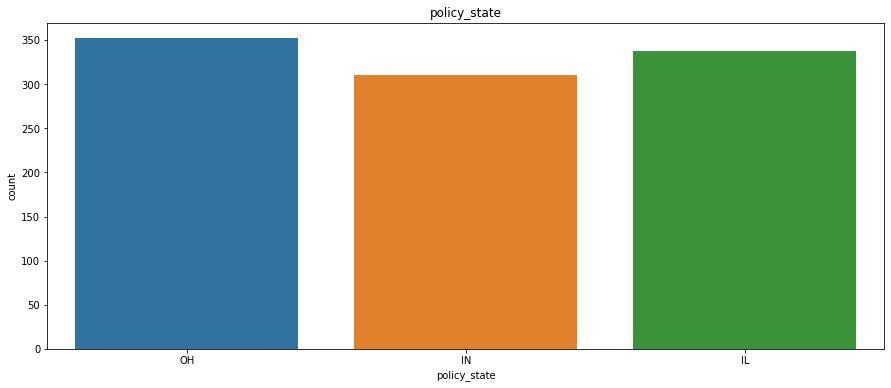

Percentage of data: 

OH    35.0
IL    34.0
IN    31.0
Name: policy_state, dtype: float64 2
************************************************************************************************************************


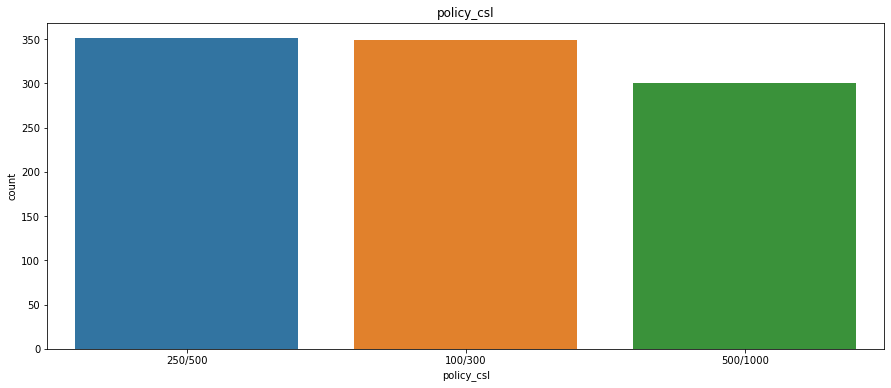

Percentage of data: 

250/500     35.0
100/300     35.0
500/1000    30.0
Name: policy_csl, dtype: float64 2
************************************************************************************************************************


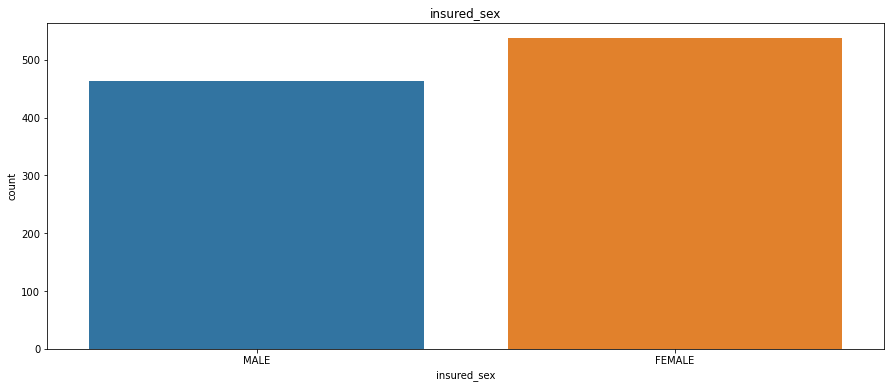

Percentage of data: 

FEMALE    54.0
MALE      46.0
Name: insured_sex, dtype: float64 2
************************************************************************************************************************


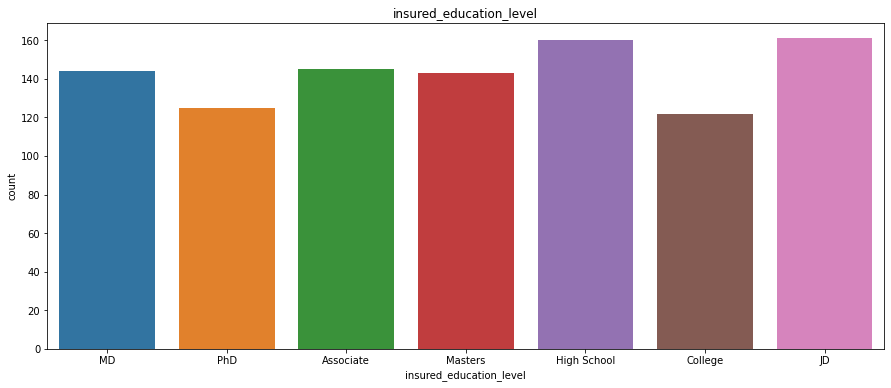

Percentage of data: 

JD             16.0
High School    16.0
Associate      14.0
MD             14.0
Masters        14.0
PhD            12.0
College        12.0
Name: insured_education_level, dtype: float64 2
************************************************************************************************************************


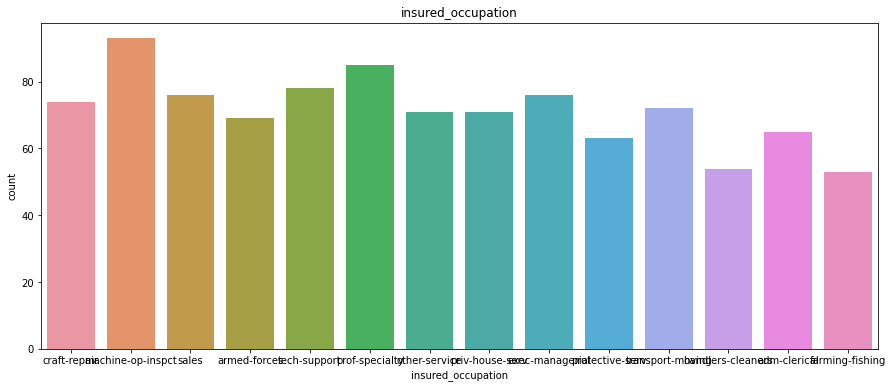

Percentage of data: 

machine-op-inspct    9.0
prof-specialty       8.0
tech-support         8.0
sales                8.0
exec-managerial      8.0
craft-repair         7.0
transport-moving     7.0
other-service        7.0
priv-house-serv      7.0
armed-forces         7.0
adm-clerical         6.0
protective-serv      6.0
handlers-cleaners    5.0
farming-fishing      5.0
Name: insured_occupation, dtype: float64 2
************************************************************************************************************************


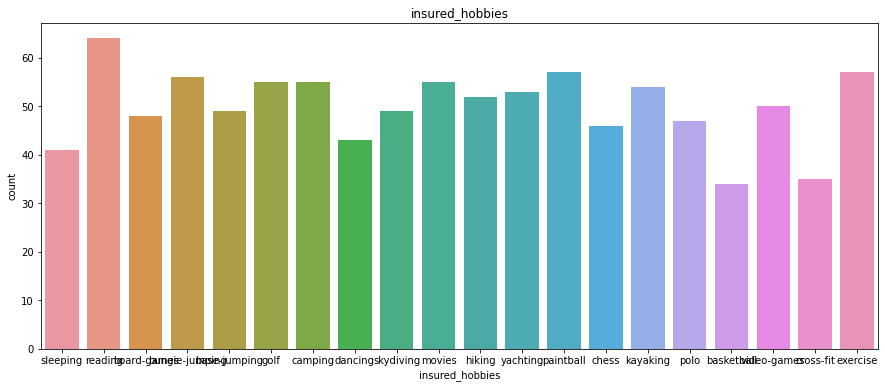

Percentage of data: 

reading           6.0
exercise          6.0
paintball         6.0
bungie-jumping    6.0
movies            6.0
golf              6.0
camping           6.0
kayaking          5.0
yachting          5.0
hiking            5.0
video-games       5.0
skydiving         5.0
base-jumping      5.0
board-games       5.0
polo              5.0
chess             5.0
dancing           4.0
sleeping          4.0
cross-fit         4.0
basketball        3.0
Name: insured_hobbies, dtype: float64 2
************************************************************************************************************************


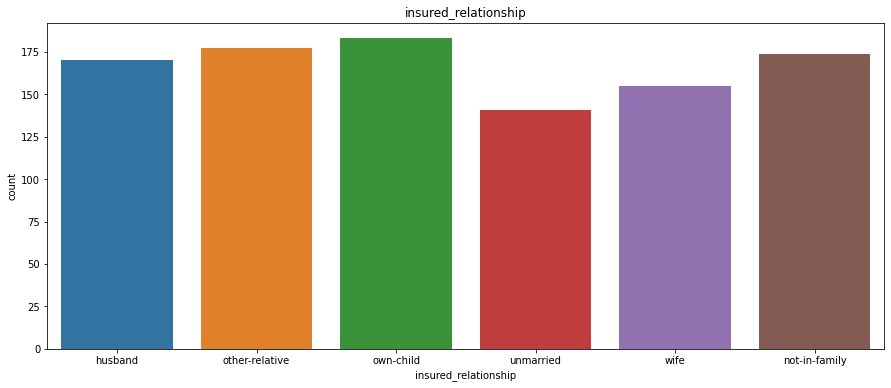

Percentage of data: 

own-child         18.0
other-relative    18.0
not-in-family     17.0
husband           17.0
wife              16.0
unmarried         14.0
Name: insured_relationship, dtype: float64 2
************************************************************************************************************************


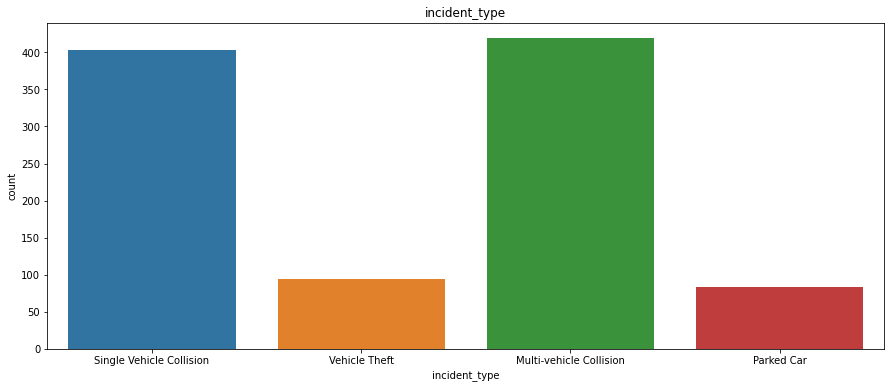

Percentage of data: 

Multi-vehicle Collision     42.0
Single Vehicle Collision    40.0
Vehicle Theft                9.0
Parked Car                   8.0
Name: incident_type, dtype: float64 2
************************************************************************************************************************


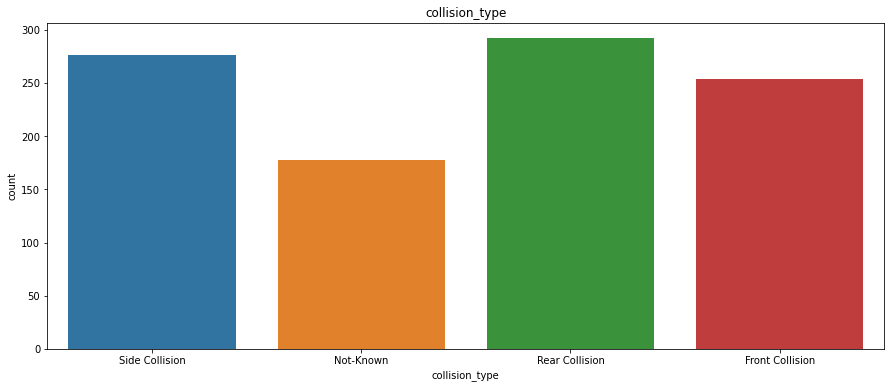

Percentage of data: 

Rear Collision     29.0
Side Collision     28.0
Front Collision    25.0
Not-Known          18.0
Name: collision_type, dtype: float64 2
************************************************************************************************************************


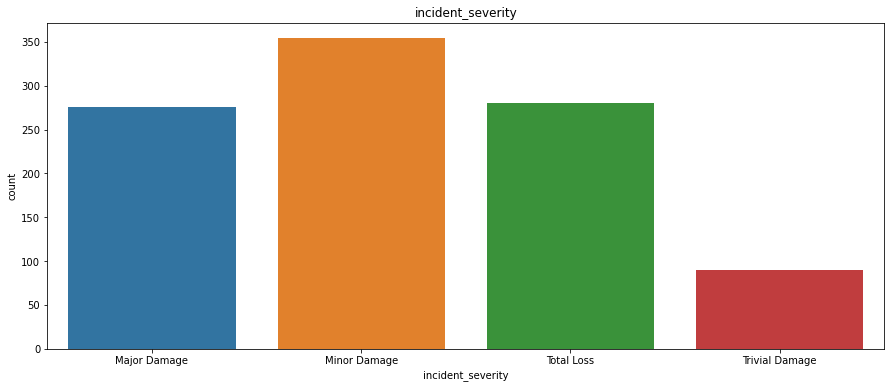

Percentage of data: 

Minor Damage      35.0
Total Loss        28.0
Major Damage      28.0
Trivial Damage     9.0
Name: incident_severity, dtype: float64 2
************************************************************************************************************************


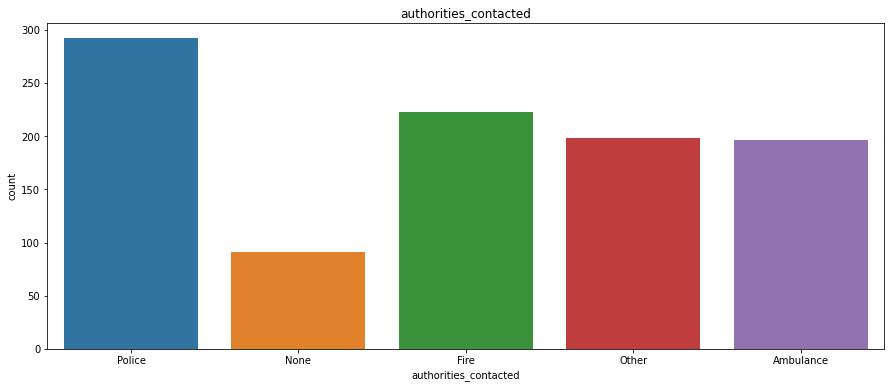

Percentage of data: 

Police       29.0
Fire         22.0
Other        20.0
Ambulance    20.0
None          9.0
Name: authorities_contacted, dtype: float64 2
************************************************************************************************************************


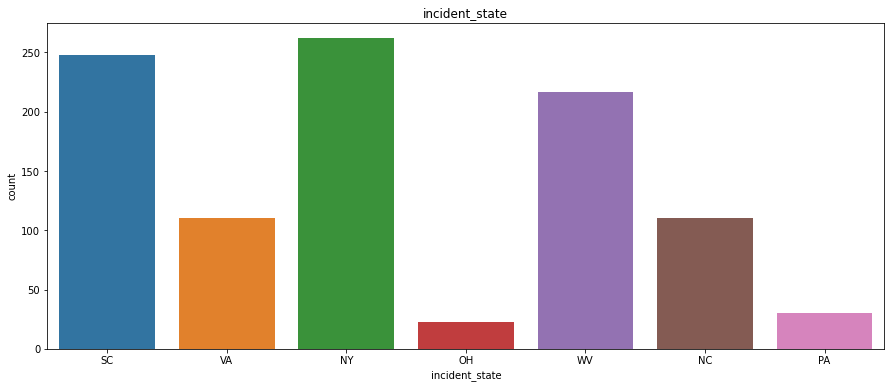

Percentage of data: 

NY    26.0
SC    25.0
WV    22.0
VA    11.0
NC    11.0
PA     3.0
OH     2.0
Name: incident_state, dtype: float64 2
************************************************************************************************************************


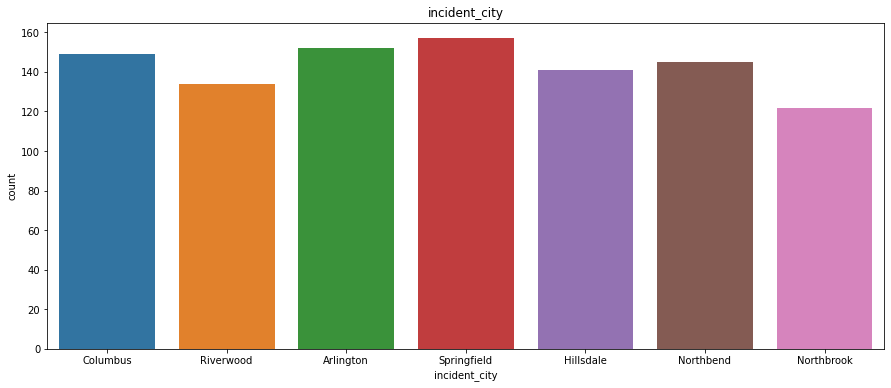

Percentage of data: 

Springfield    16.0
Arlington      15.0
Columbus       15.0
Northbend      14.0
Hillsdale      14.0
Riverwood      13.0
Northbrook     12.0
Name: incident_city, dtype: float64 2
************************************************************************************************************************


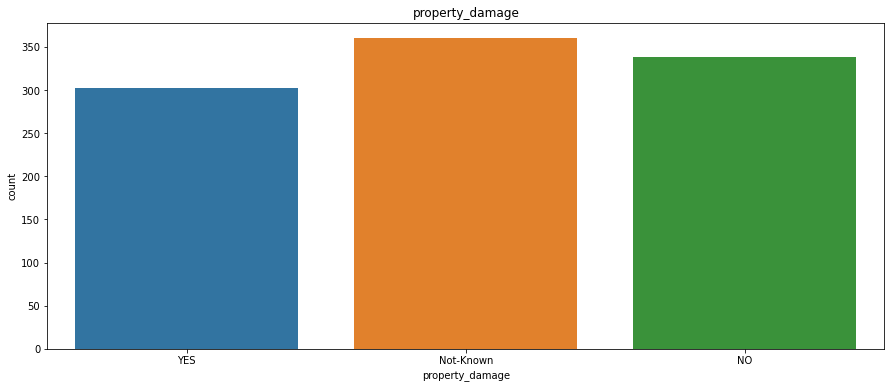

Percentage of data: 

Not-Known    36.0
NO           34.0
YES          30.0
Name: property_damage, dtype: float64 2
************************************************************************************************************************


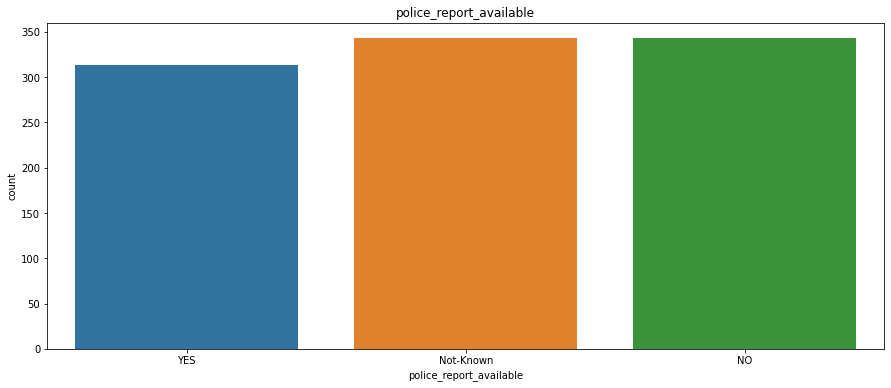

Percentage of data: 

Not-Known    34.0
NO           34.0
YES          31.0
Name: police_report_available, dtype: float64 2
************************************************************************************************************************


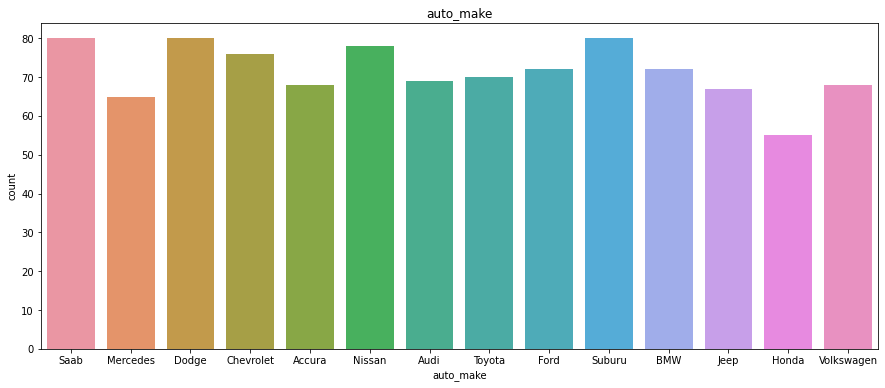

Percentage of data: 

Saab          8.0
Dodge         8.0
Suburu        8.0
Nissan        8.0
Chevrolet     8.0
Ford          7.0
BMW           7.0
Toyota        7.0
Audi          7.0
Accura        7.0
Volkswagen    7.0
Jeep          7.0
Mercedes      6.0
Honda         6.0
Name: auto_make, dtype: float64 2
************************************************************************************************************************


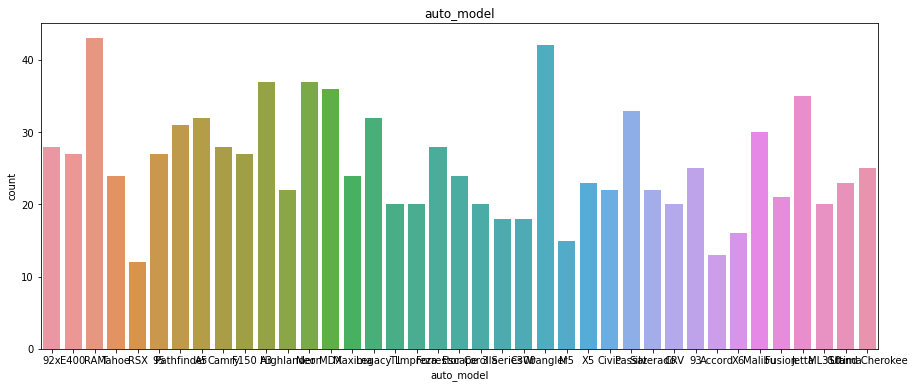

Percentage of data: 

RAM               4.0
Wrangler          4.0
A3                4.0
Neon              4.0
MDX               4.0
Jetta             4.0
Passat            3.0
A5                3.0
Legacy            3.0
Pathfinder        3.0
Malibu            3.0
92x               3.0
Camry             3.0
Forrestor         3.0
F150              3.0
95                3.0
E400              3.0
93                2.0
Grand Cherokee    2.0
Escape            2.0
Tahoe             2.0
Maxima            2.0
Ultima            2.0
X5                2.0
Highlander        2.0
Civic             2.0
Silverado         2.0
Fusion            2.0
ML350             2.0
Impreza           2.0
Corolla           2.0
TL                2.0
CRV               2.0
C300              2.0
3 Series          2.0
X6                2.0
M5                2.0
Accord            1.0
RSX               1.0
Name: auto_model, dtype: float64 2
*************************************************************************************

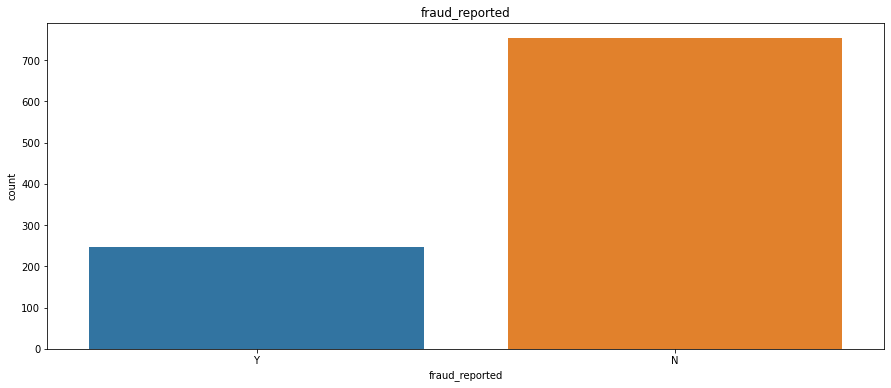

Percentage of data: 

N    75.0
Y    25.0
Name: fraud_reported, dtype: float64 2
************************************************************************************************************************


In [23]:
# plotting categorical data
for column in df.columns:
    if df[column].dtypes == object:
        plt.figure(figsize=(15,6))
        sns.countplot(df[column])
        plt.title(column)
        plt.show()
        
        print("Percentage of data: \n")
        print(round(df[column].value_counts()/1000*100),2)  #1000 is the entire data
        print('*'*120)

Observations:<br>
1. In Policy state we see that OH has more percentage than IL followed by IN.<br>
2. In Policy CSL we see that 250/500 and 100/300 has same count.<br>
3. Females are more than male as shown in insured_sex count plot.<br>
4. Insured education level shows JD and High school having most counts.<br>
5. Highest insured occupation is found to be macchne-op-inspct followed by prof-specialty and lowerst is farming-fishing, handlers-cleaners.<br>
6. Most common insured hobbies is found to be reading, exercise, paintball and most rare is basketball.<br>
7. Most common relationship is found 'Own-child' and most least is unmarried.<br>
8. Most common incident for insurance claim is Multi-vehicle Collision.<br>
9. And collision type is usually Rear collision.<br>
10.Severity of incident is mostly minor damage for which people tend to claim their insurance.<br>
11.Police is most common authority to be contacted in case of incidents.<br>
12.These incidences are common in NY state and least common in OH state.<br>
13.In Springfield city is most common for incidences of insurance claims.<br>
14.REason of property damage is mostly not known.<br>
15.Police report during the incident is mostly not known or not available.<br>
16.Most insurance claim is for automobile of make Saab, Dodge, Suburu.<br>
17.Most common auto model is RAM, Wrangler, A3, Neon, MDX etc.<br>
18.Most times the fraud is not reported.<br>

Single digit category column name: fraud_reported


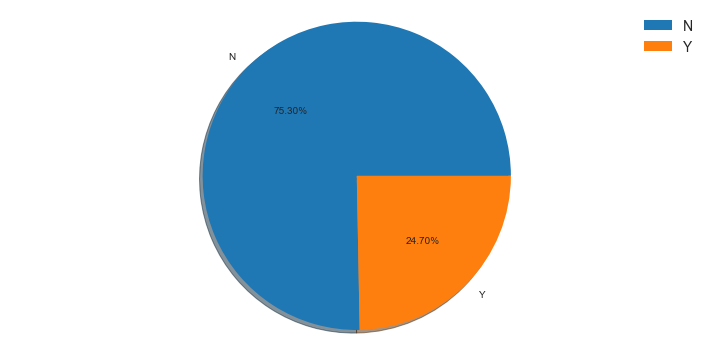

Single digit category column name: insured_sex


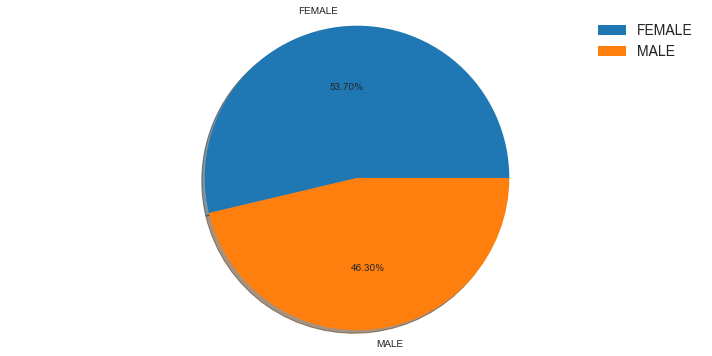

Single digit category column name: policy_state


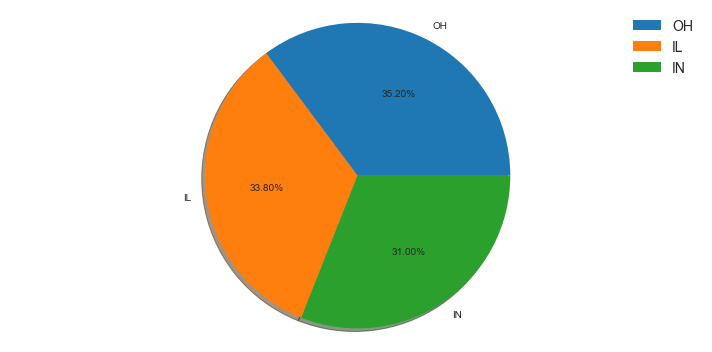

Single digit category column name: policy_csl


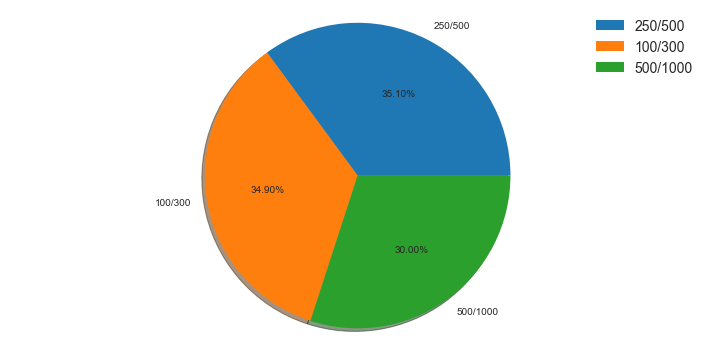

Single digit category column name: policy_deductable


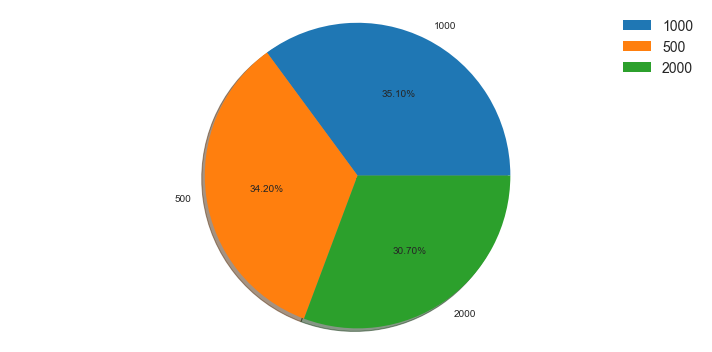

Single digit category column name: bodily_injuries


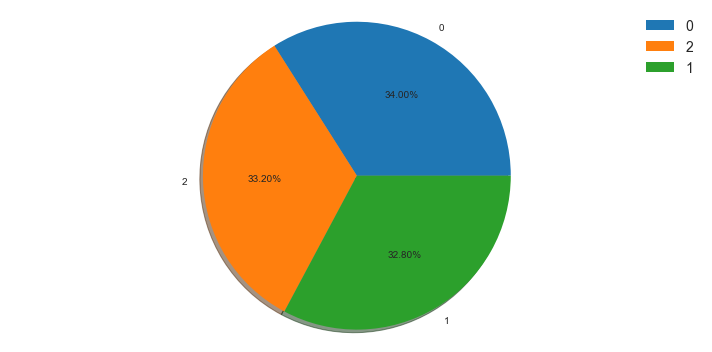

Single digit category column name: police_report_available


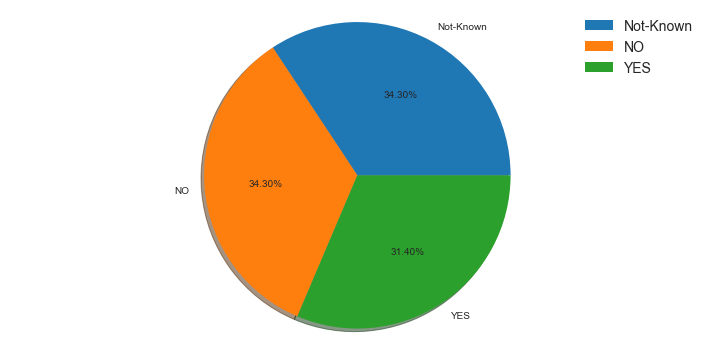

Single digit category column name: property_damage


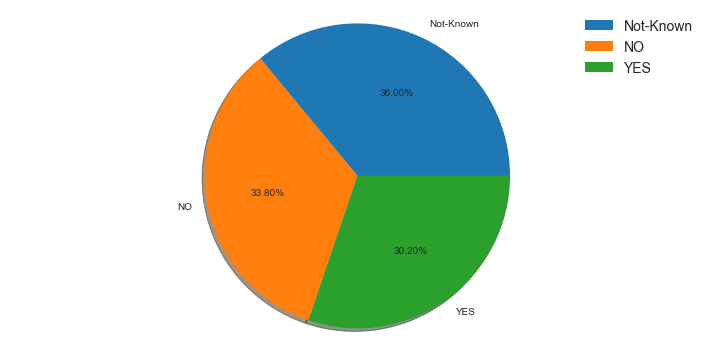

Single digit category column name: incident_type


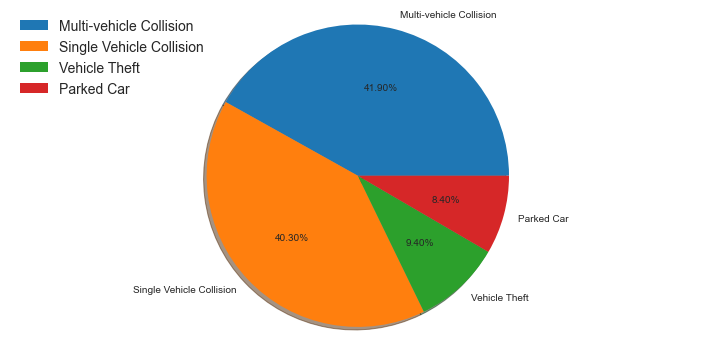

Single digit category column name: collision_type


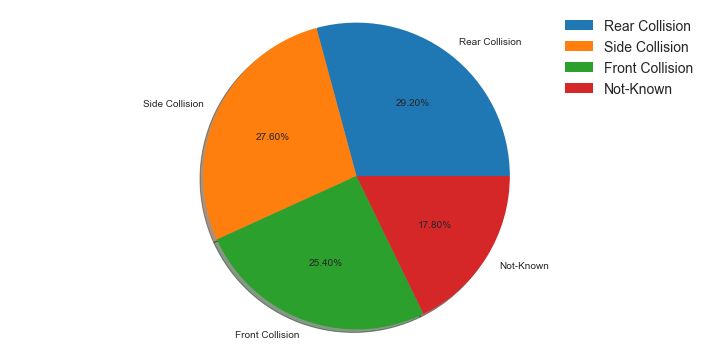

Single digit category column name: incident_severity


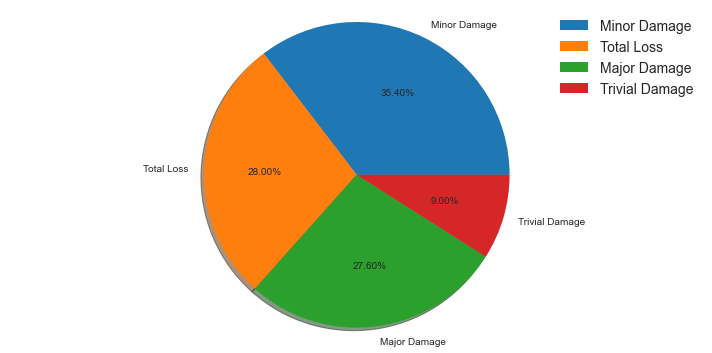

Single digit category column name: number_of_vehicles_involved


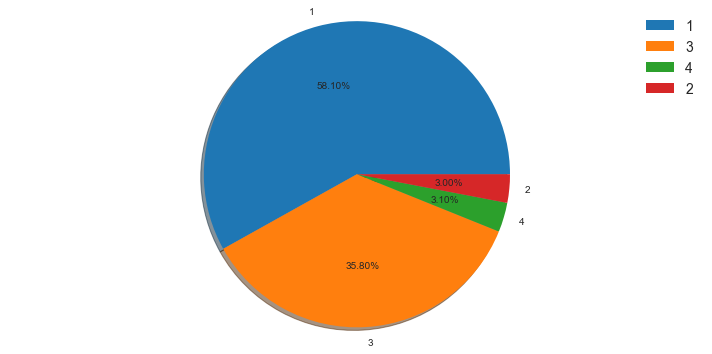

Single digit category column name: witnesses


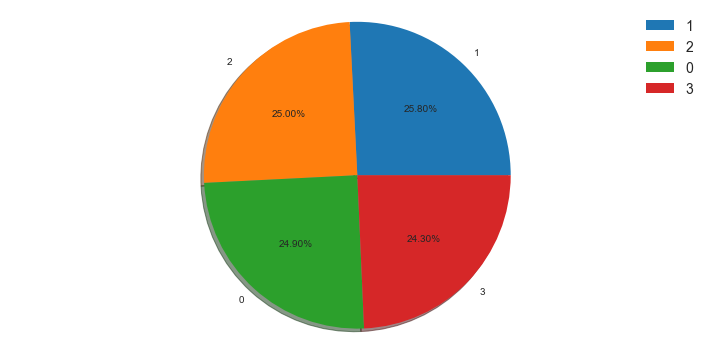

Single digit category column name: authorities_contacted


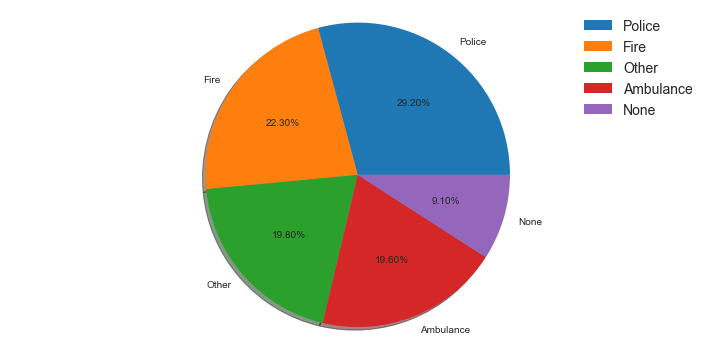

Single digit category column name: insured_relationship


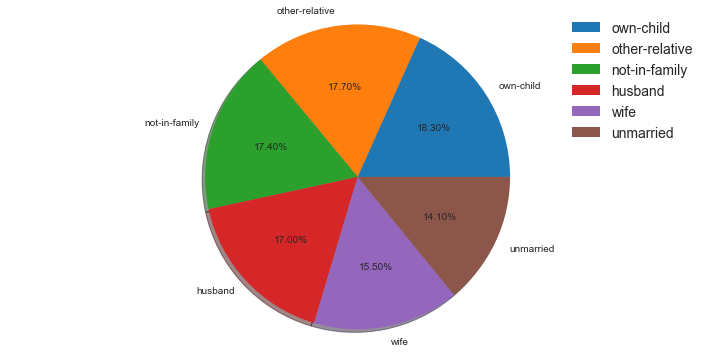

Single digit category column name: insured_education_level


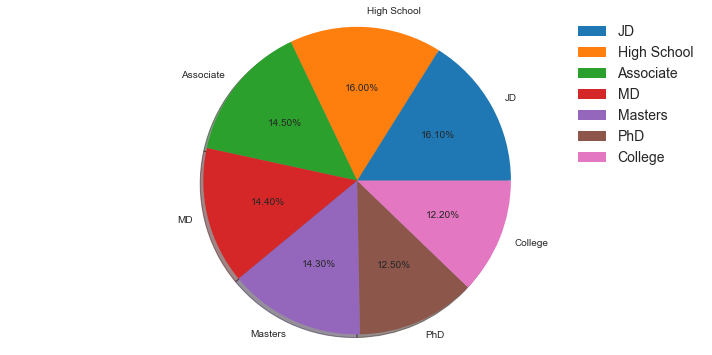

Single digit category column name: incident_state


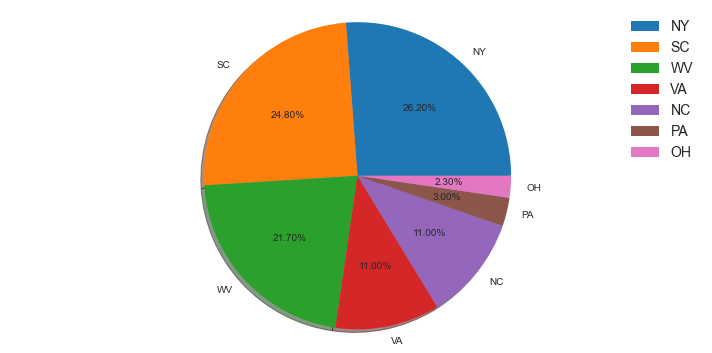

Single digit category column name: incident_city


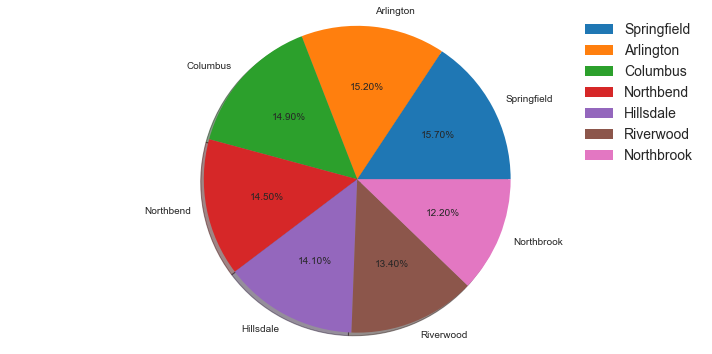

In [24]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

list1 = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in df[list1]:
    print(f"Single digit category column name:", i)
    generate_pie(df[i])

In the above pie plots we can see the categorical data distribution among the dataset rows covering a single set number of data points in each value.<br>

Observations:<br>

1.We can see that less number of data cover the yes portion of fraud reported and since this is our target label it indicates towards the problem of class imbalance as well.<br>
2.We can see that almost both male and female have insurance but the data coverage for female is a bit higher than their male couterparts.<br>
3.For policy state Ohio has a larger chunk of data as compared to Illinois and Indiana but all 3 have pretty much similar data points.<br>
4.In the policy sections again we see that 250/500 category has a slighty higher data coverage than the 100-300 and 500/1000 categories.<br>
5.With respect to policy deductable criteria we can see 1000 to be at a higher rate than it's 500 and 2000 data counterparts.<br>
6.In terms of bodily injueries the severity for level 0 is slightly higher than the level 2 and 1.<br>
7.For police report availability only 31.40 percent people were able to produce genuine reports while the remaining 34.30 percent were either unable to show a report or the authenticity was not known.<br>
8.When checking for property damage data we see that 36 percent of the information is questionable while 33.80 percent people did not face any property damage so only 30.20 percent people suffered from property damage.<br>
9.When we check for accident type then single vehicle and multi vehicle collisions have covered more than 40 percent data each and then we have 9.40 percent incidents for vehicle theft and 8.40 percent incidents for parked car.<br>
10.For collision type categories we see 29.20 percent incident vehicles with rear collision which is like the highest and 17.80 percent of vehicle incidents are not known.<br>
11.measuring the incident severity the highest category covers for minor damages with 35.40 percent and lowest number in incident severity is of 9 percent that only has trivial damage data.<br>
12.for number of vehicles being involved in an incident majorly lies for 1 and 3.<br>
13.When we check for witnesses section then all the categories of witnesses are almost similarly distributed.<br>
14.The data on whether an authority was contacted after an accident covers the police being notified the most then the fire brigade and ambulances but also has data on others being called and none being informed when it came to contacting people.<br>
15.Again for insured relationship column I see almost all the categorical value equally distributed and covering the data rows.<br>
16.Similar to insured relationship even insured education level column has it's data rows distributed equally amongst all the categorical values it holds.<br>
17.For the incident state column I see major portion of data rows are covered by New York, South Carolina and West Virginia states.<br>
18.While checking for incident related city all the cities that are listed in the column have an equal share of data coverage.<br>

insured_sex vs fraud_reported column


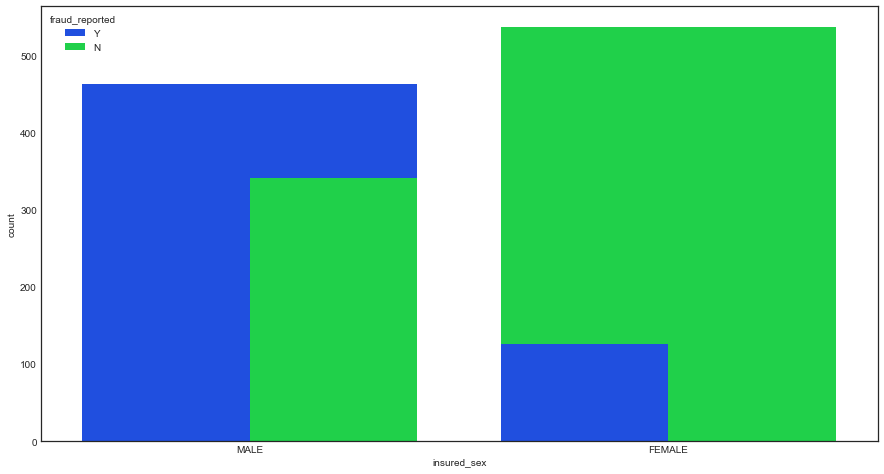

policy_state vs fraud_reported column


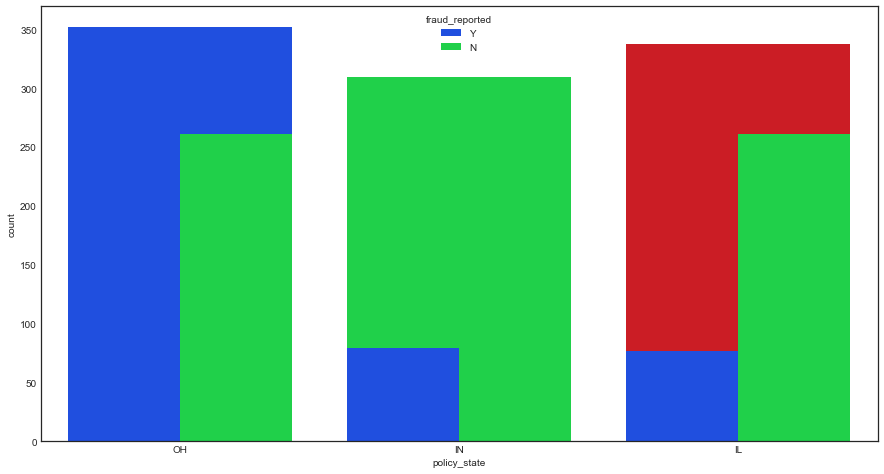

policy_csl vs fraud_reported column


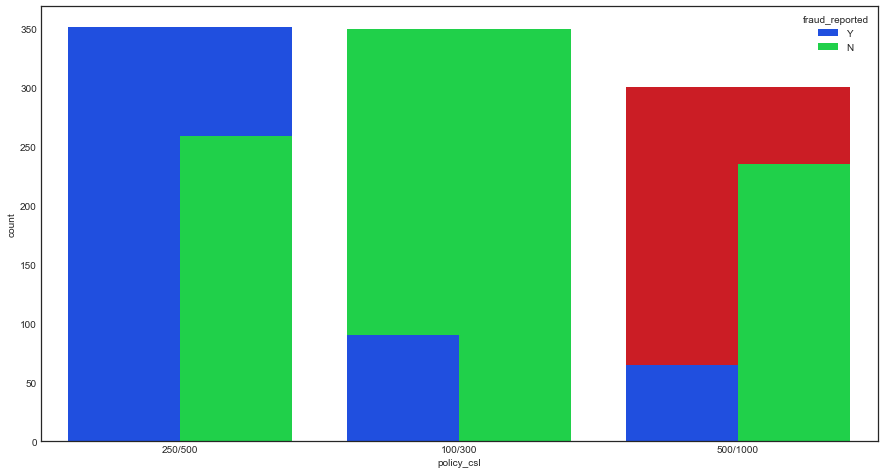

policy_deductable vs fraud_reported column


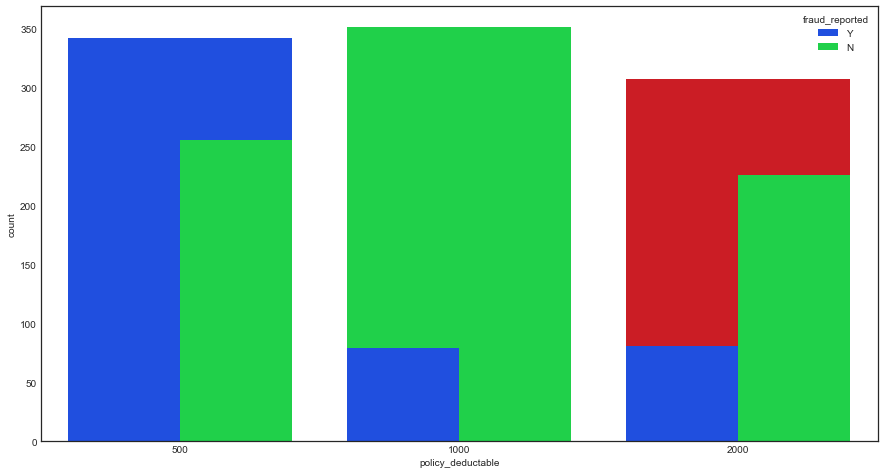

bodily_injuries vs fraud_reported column


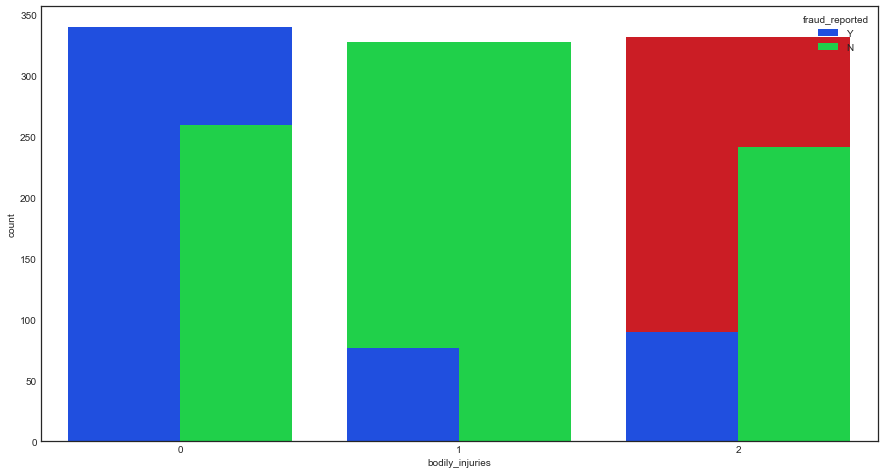

police_report_available vs fraud_reported column


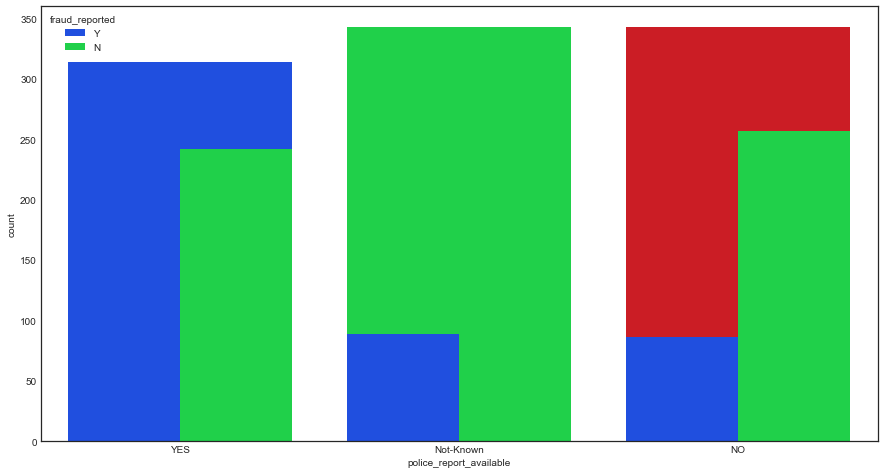

property_damage vs fraud_reported column


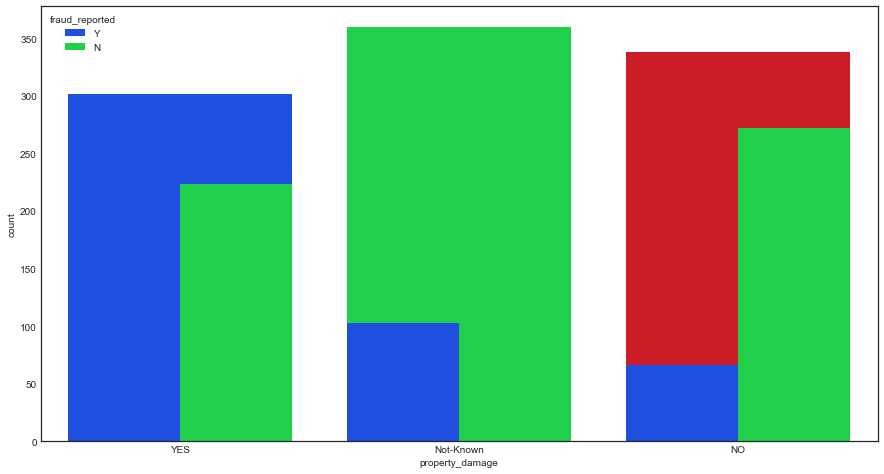

incident_type vs fraud_reported column


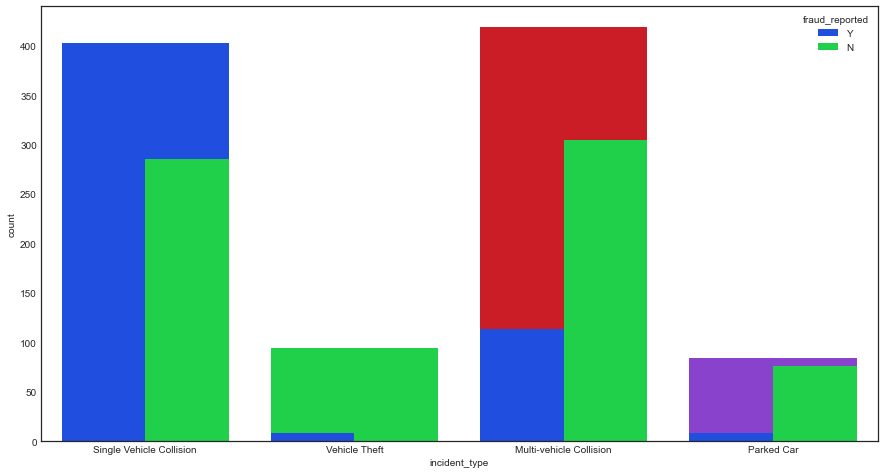

collision_type vs fraud_reported column


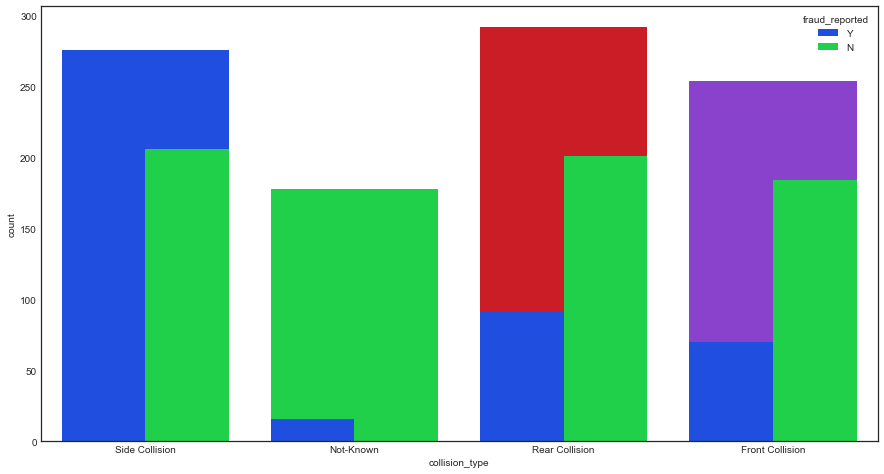

incident_severity vs fraud_reported column


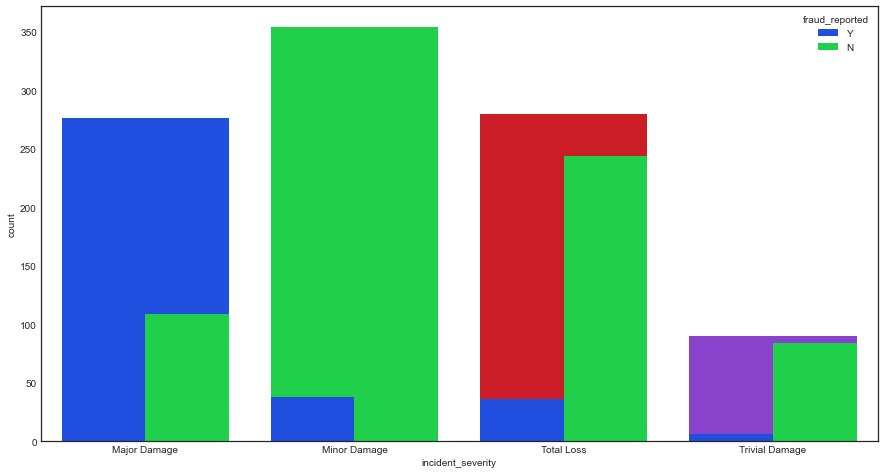

number_of_vehicles_involved vs fraud_reported column


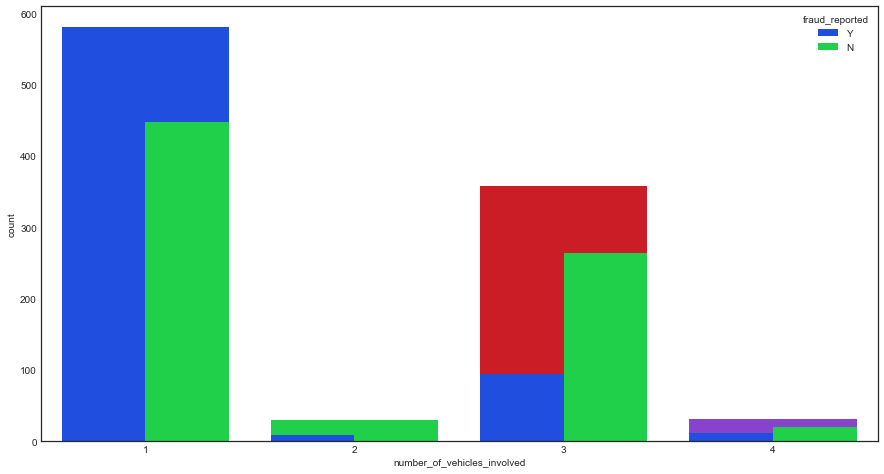

witnesses vs fraud_reported column


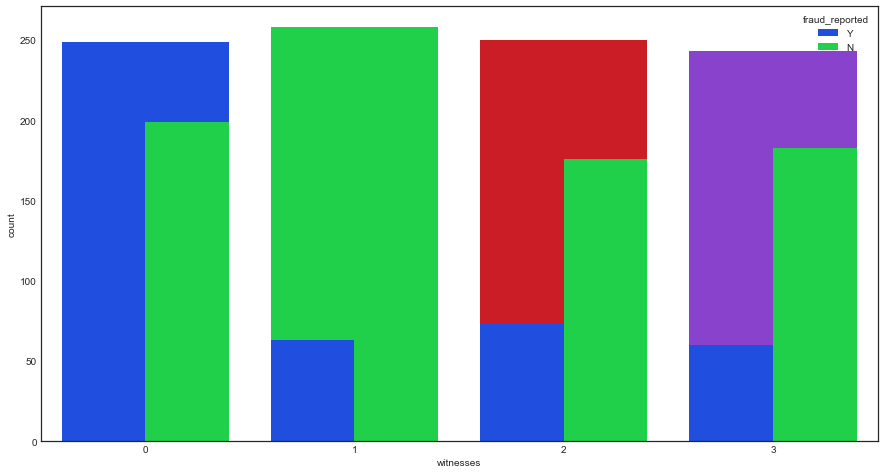

authorities_contacted vs fraud_reported column


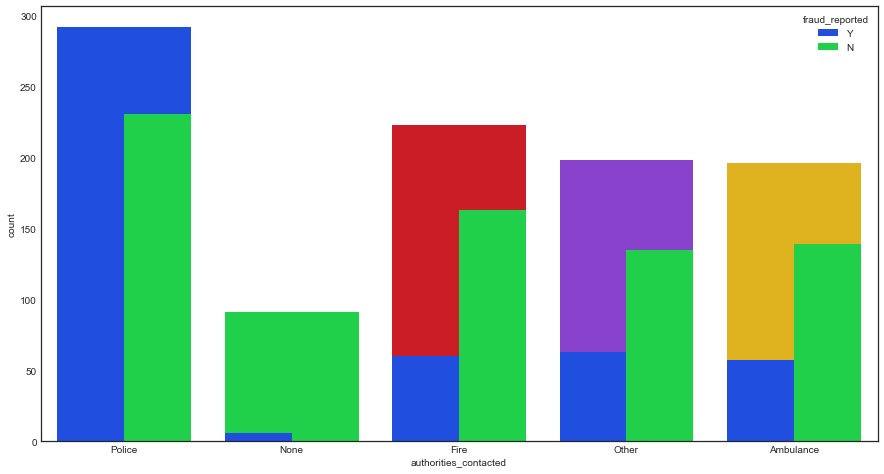

insured_relationship vs fraud_reported column


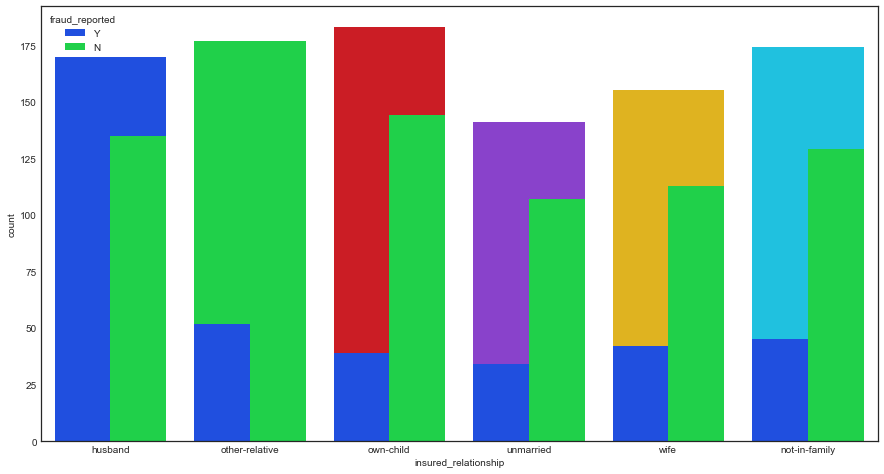

insured_education_level vs fraud_reported column


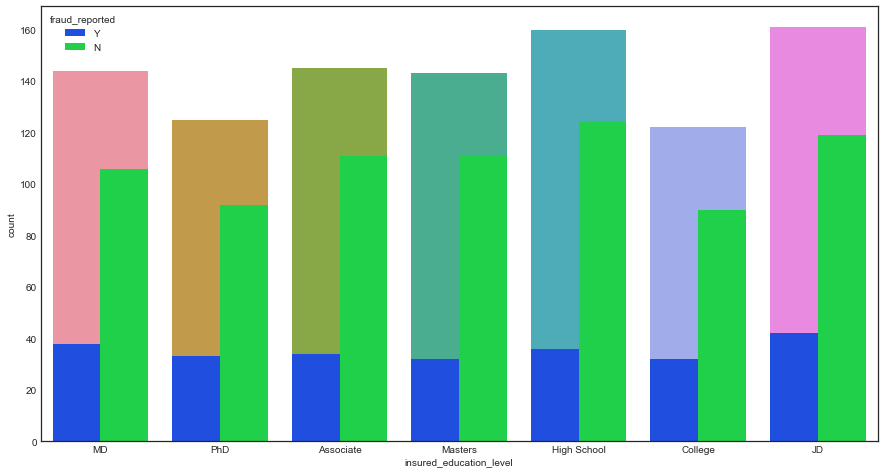

incident_state vs fraud_reported column


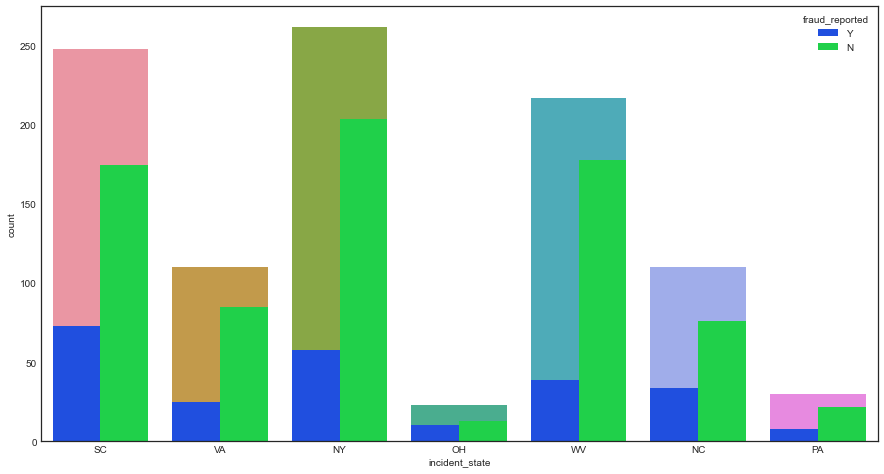

incident_city vs fraud_reported column


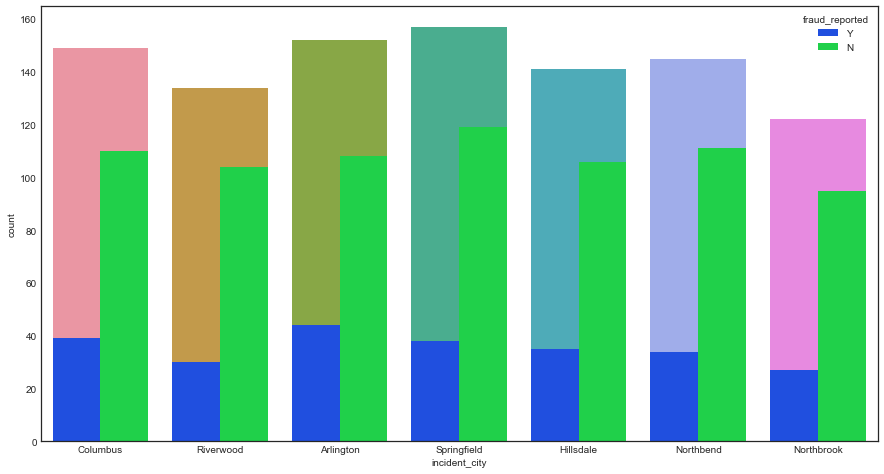

umbrella_limit vs fraud_reported column


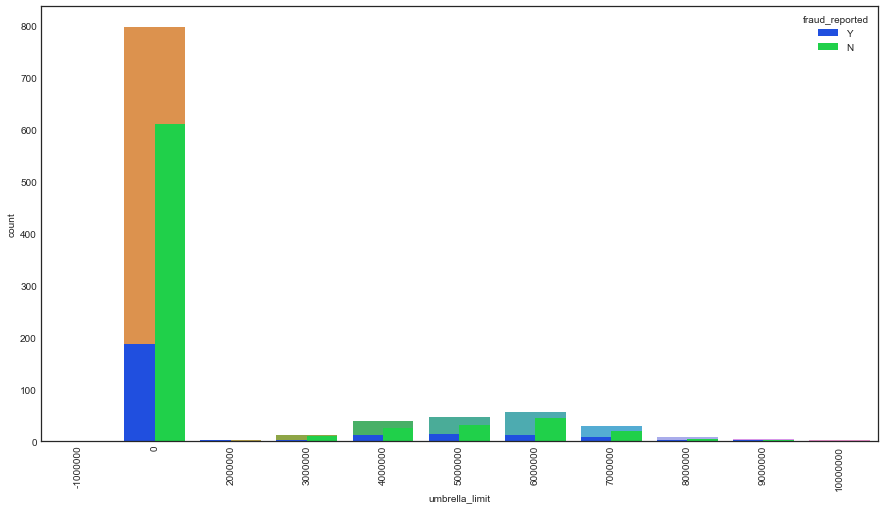

insured_occupation vs fraud_reported column


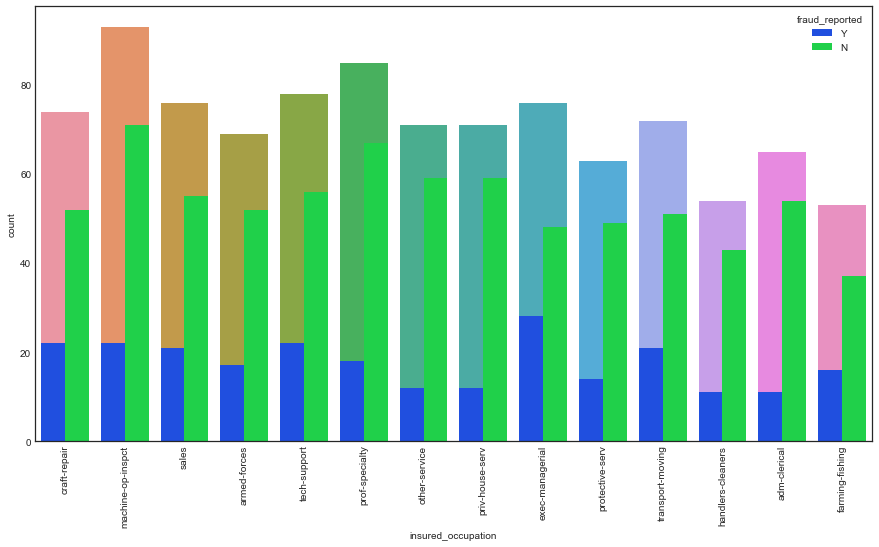

auto_make vs fraud_reported column


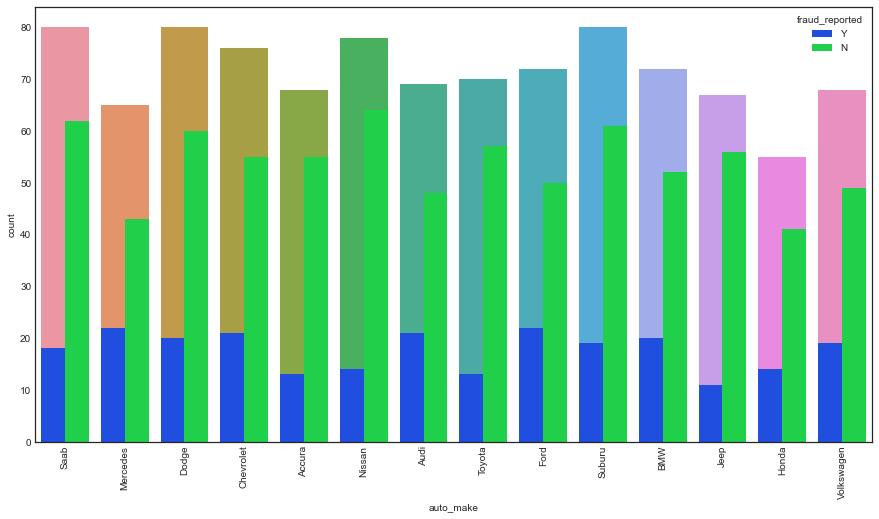

insured_hobbies vs fraud_reported column


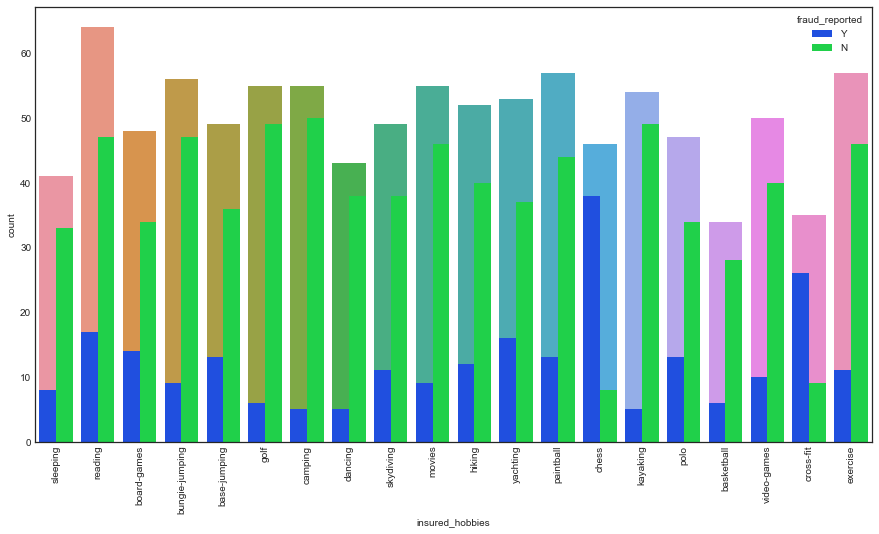

auto_model vs fraud_reported column


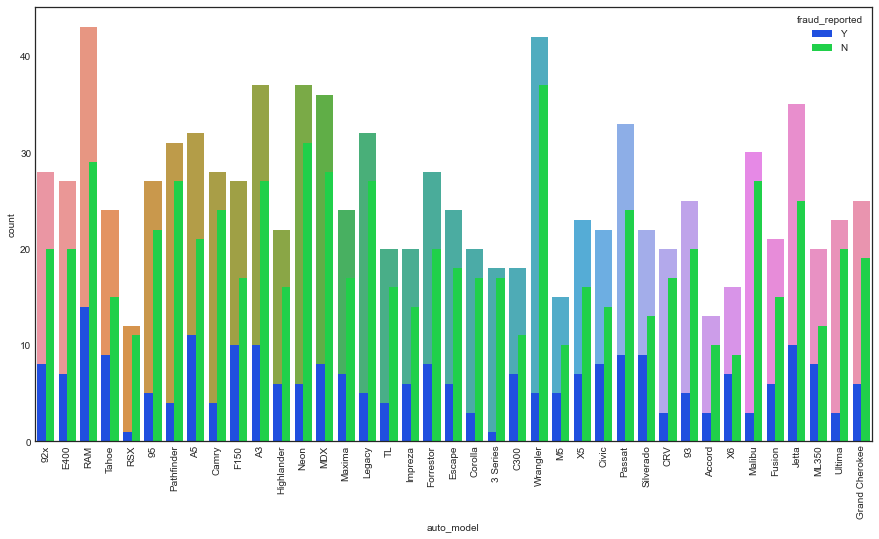

In [25]:
list2 = ['umbrella_limit', 'insured_occupation', 'auto_make', 'insured_hobbies', 'auto_model']
plt.style.use('seaborn-bright')

list1.remove("fraud_reported")

for m in df[list1]:
    plt.figure(figsize=(15,8))
    print(f"{m} vs fraud_reported column")
    sns.countplot(df[m])
    sns.countplot(df[m], hue=df['fraud_reported'])
    plt.show()
    
for n in df[list2]:
    plt.figure(figsize=(15,8))
    print(f"{n} vs fraud_reported column")
    sns.countplot(df[n])
    sns.countplot(df[n], hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.show()

        

Observations:<br>
1. Comapring male and female, male has reported more insurance frauds than females.<br>
2. OH policy state has reported more fruads.<br>
3. 250/500 has reported maximum frauds.<br>
4. Cases having 0 bodily injuries has reported more frauds.<br>
5.Cases where police report were available has reported maximum insurance frauds.<br>
6.Cases having property damage has reported more frauds.<br>
7.Cases where there is single vehicle collision has reported more frauds.<br>
8.Cases recorded with major damage has reported with more insurance frauds.<br>
9.Where onl 1 vehicle is involved such cases are mostly fraudulent.<br>
10.0 witness and where police authority is contacted have more fraud cases.<br>
11.SC incident state has more cases of insurance fraud.<br>
12.Arlington city has more cases of insurance fraud.<br>
13.Most fraud cases are reported from occupation exec-manegerial.<br>
14.Mercedes auto make has reported more fraud cases.<br>


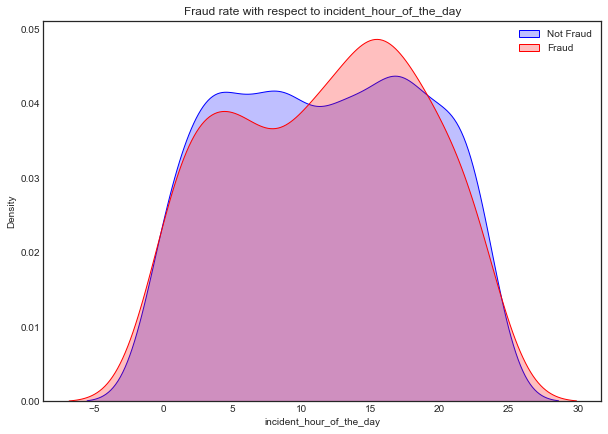

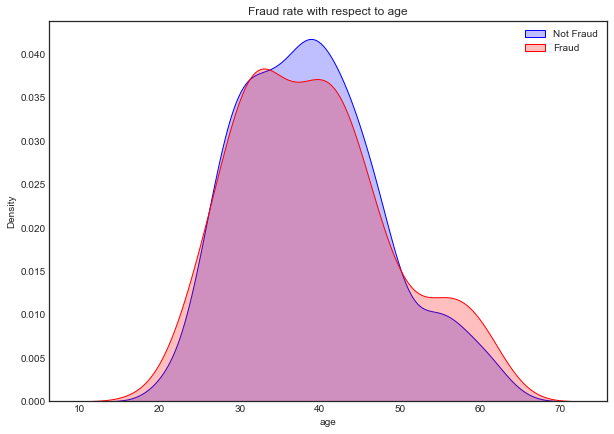

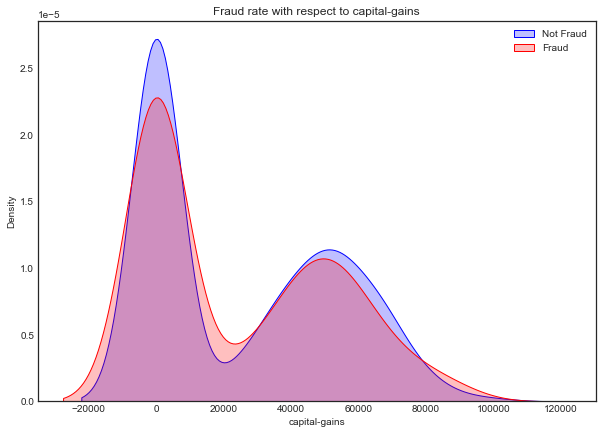

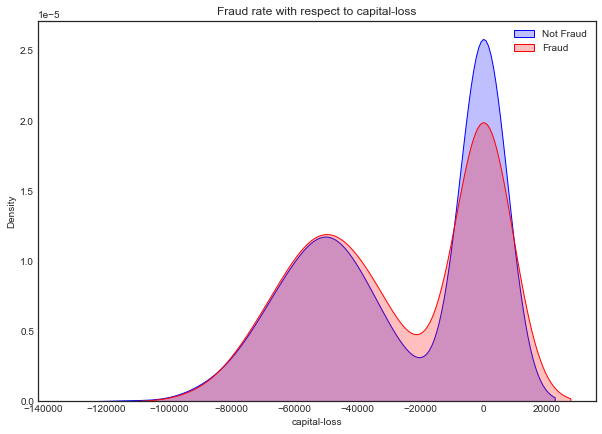

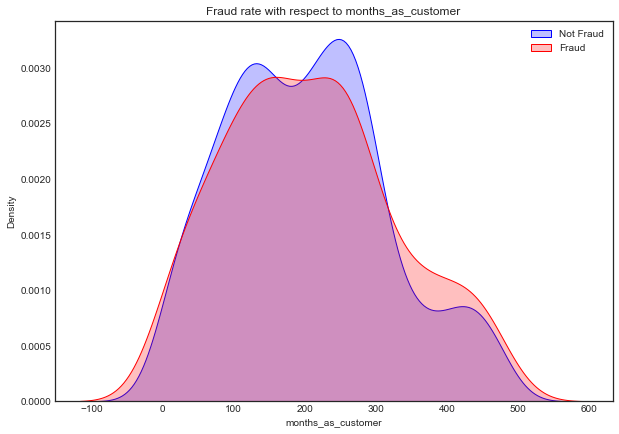

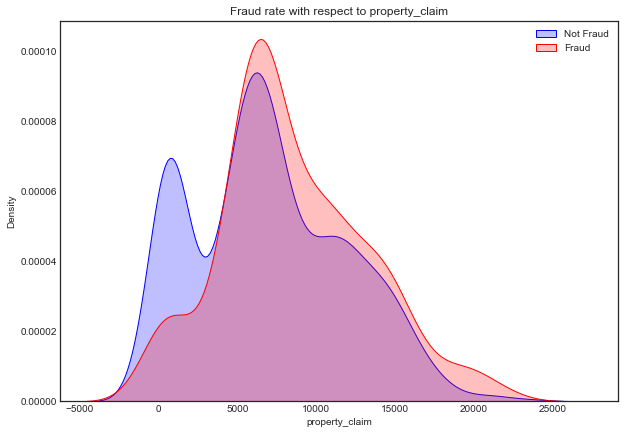

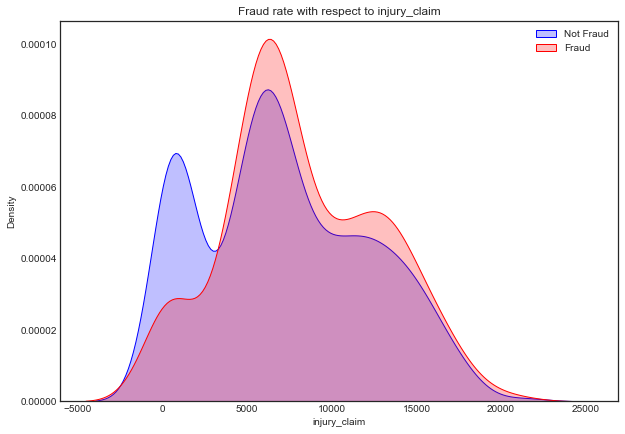

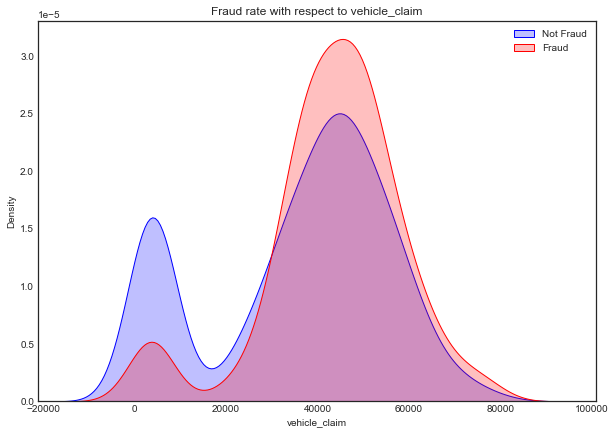

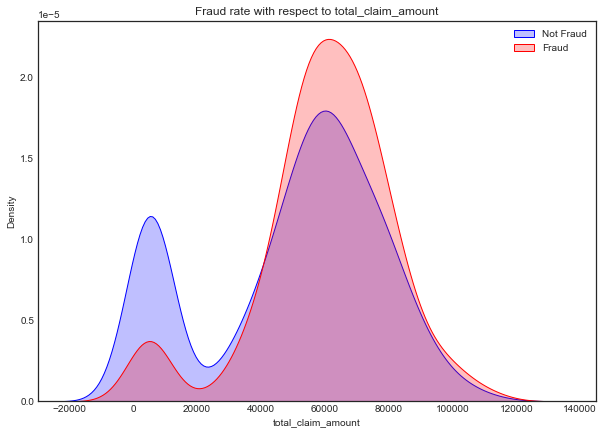

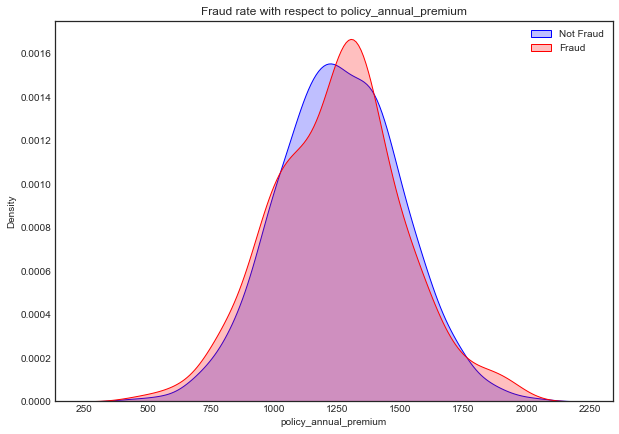

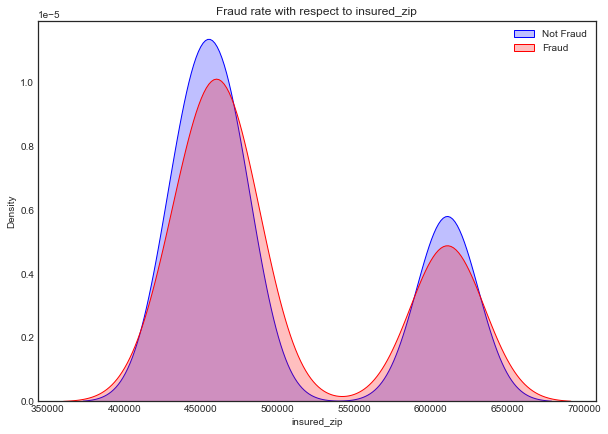

In [26]:
list3 = ['incident_hour_of_the_day', 'age', 'capital-gains', 'capital-loss', 'months_as_customer', 'property_claim',
       'injury_claim', 'vehicle_claim', 'total_claim_amount', 'policy_annual_premium', 'insured_zip']

for z in df[list3]:
    fig = plt.figure(figsize=(10,7))
    ax=sns.kdeplot(df.loc[(df['fraud_reported'] == 'N'),z], color='b', shade=True, label='Not Fraud') 
    ax=sns.kdeplot(df.loc[(df['fraud_reported'] == 'Y'),z], color='r', shade=True, label='Fraud')
    plt.title('Fraud rate with respect to {}'.format(z))
    plt.legend()
    plt.show()

Here i have plot continous data.<br>
Observations<br>
1. Age range 50-70 are more fraudulents.<br>
2. People having less capital gains do more frauds.<br>
3. People having high capital loss tend to do more frauds.<br>
4. More frauds are observed when total claim amount is above 40000.<br>

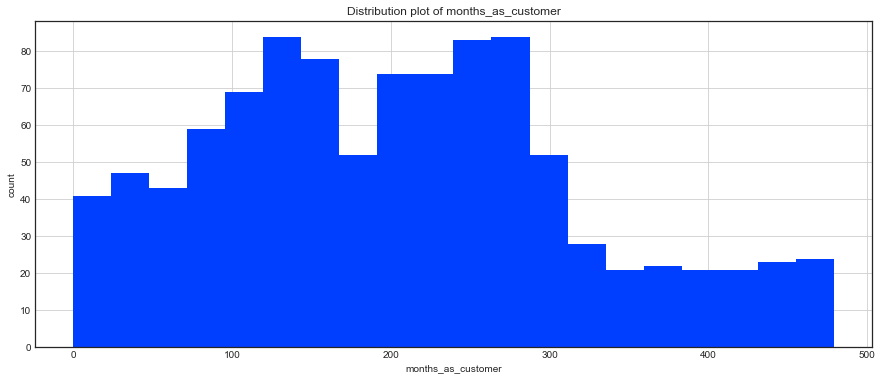

****************************************************************************************************


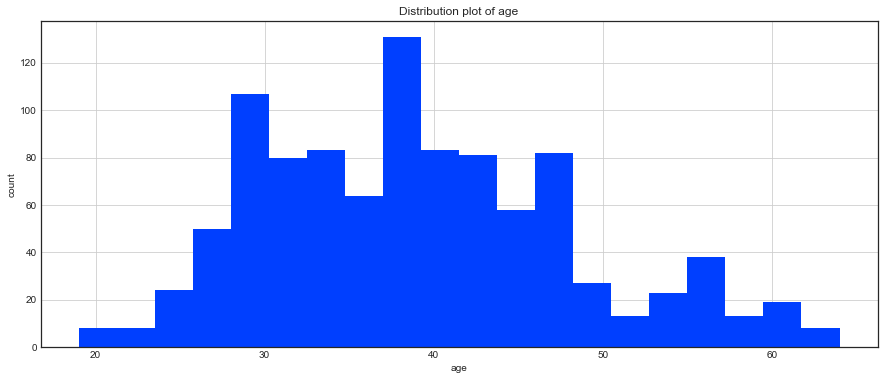

****************************************************************************************************


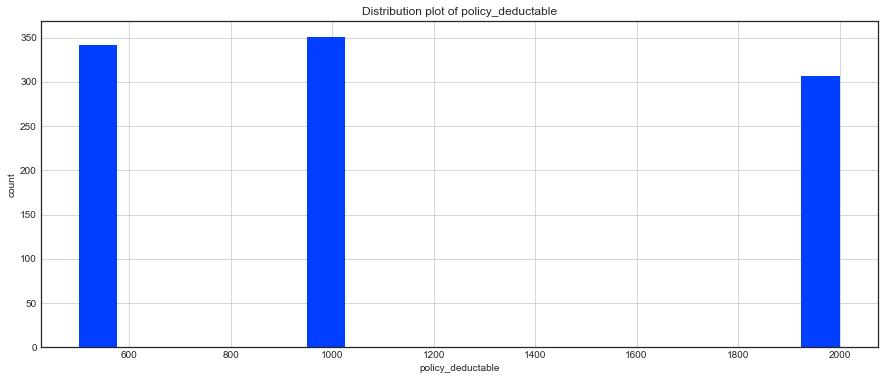

****************************************************************************************************


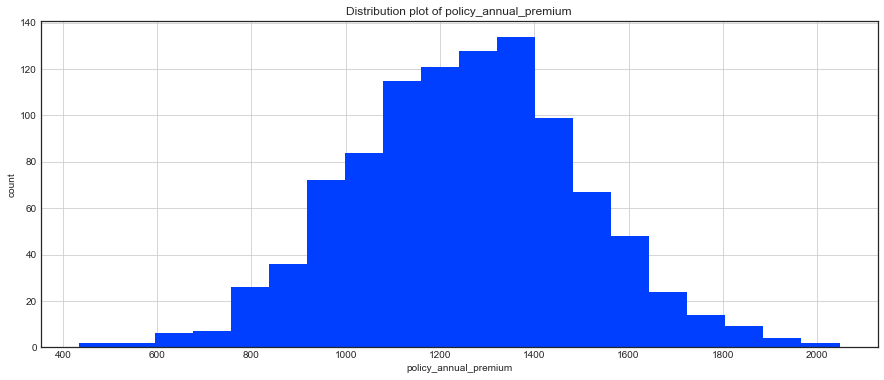

****************************************************************************************************


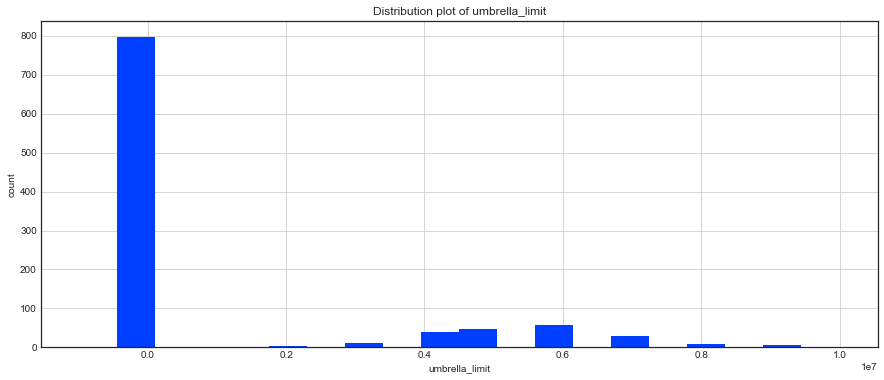

****************************************************************************************************


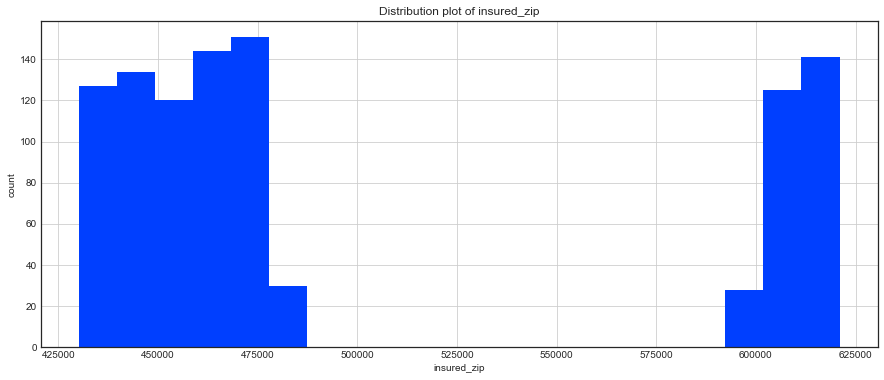

****************************************************************************************************


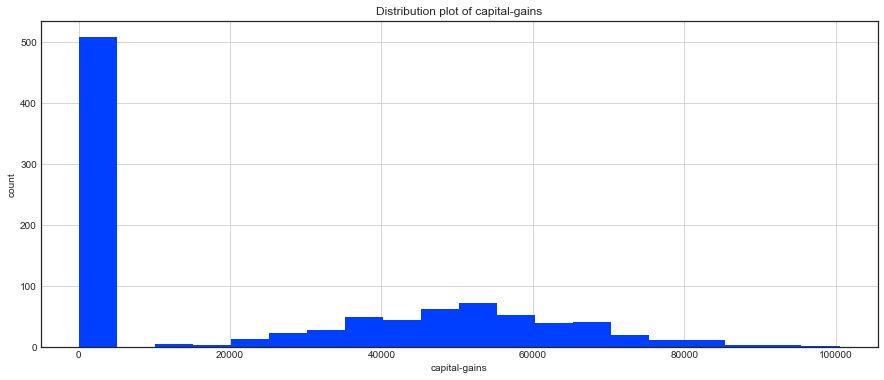

****************************************************************************************************


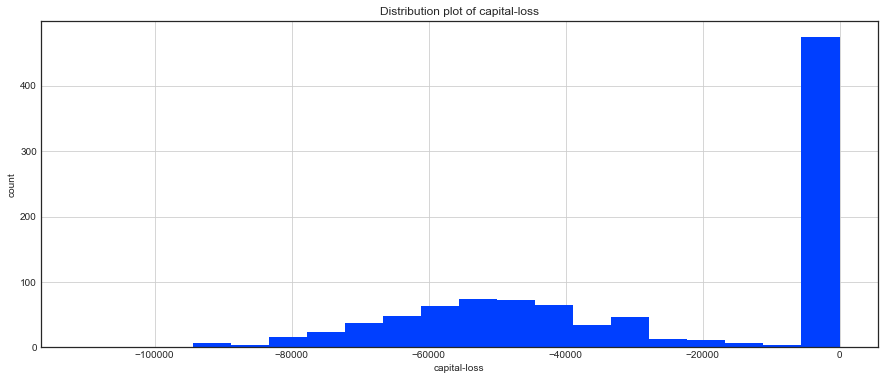

****************************************************************************************************


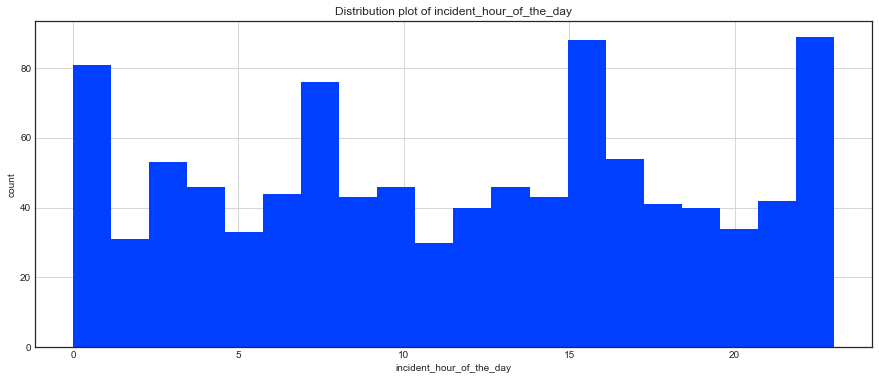

****************************************************************************************************


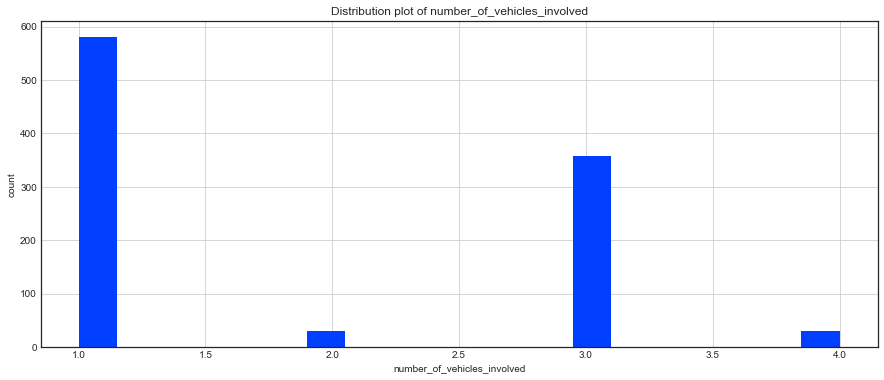

****************************************************************************************************


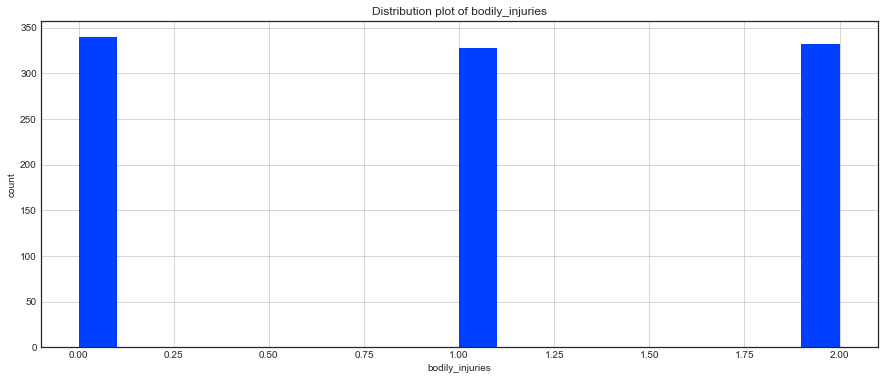

****************************************************************************************************


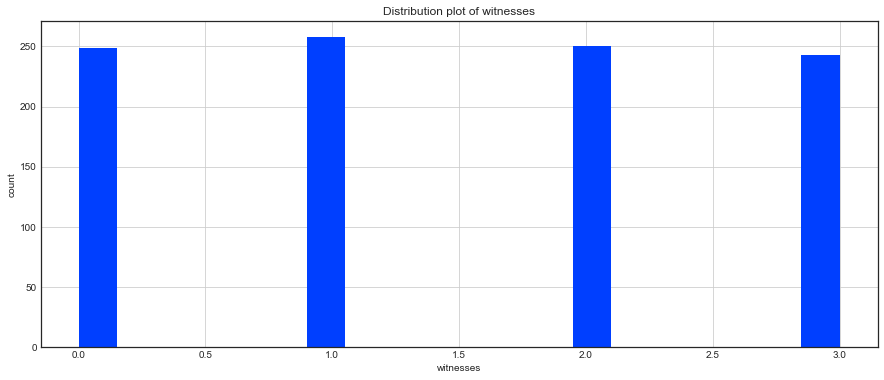

****************************************************************************************************


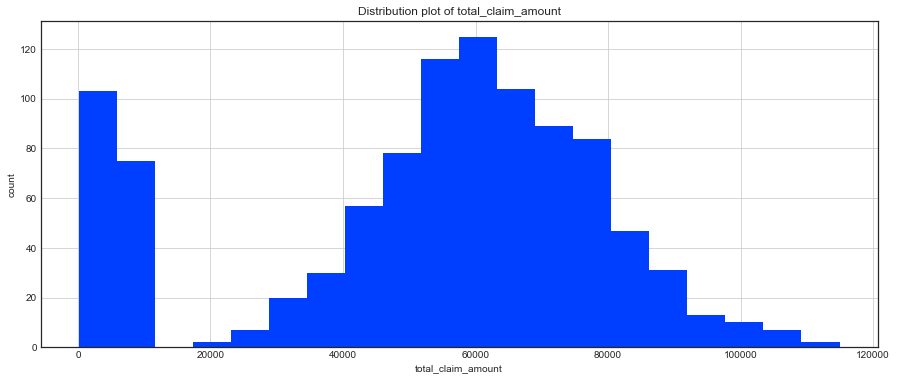

****************************************************************************************************


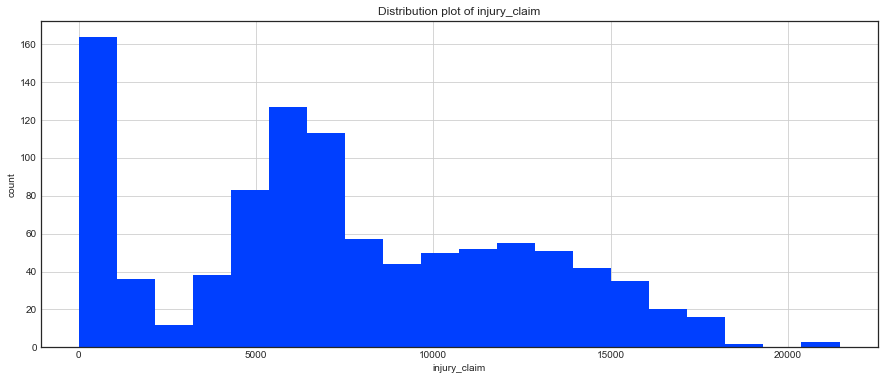

****************************************************************************************************


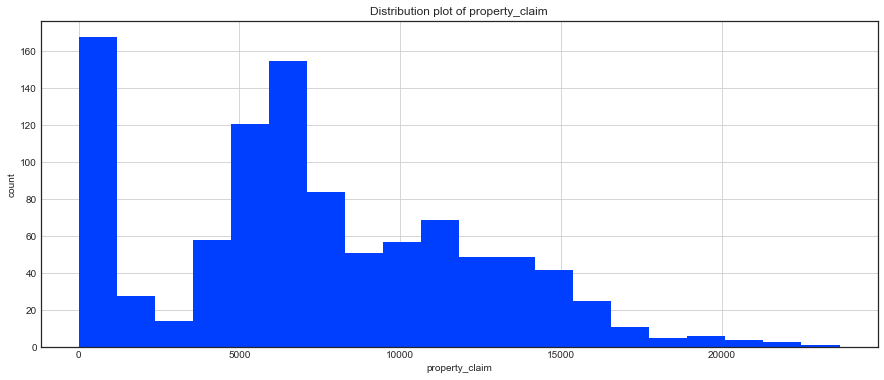

****************************************************************************************************


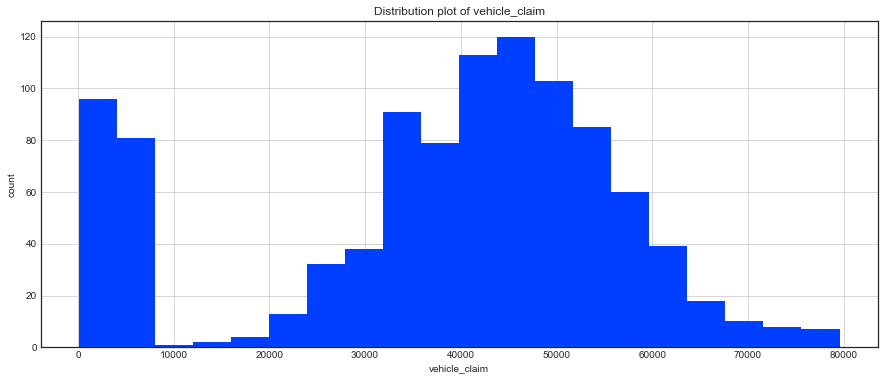

****************************************************************************************************


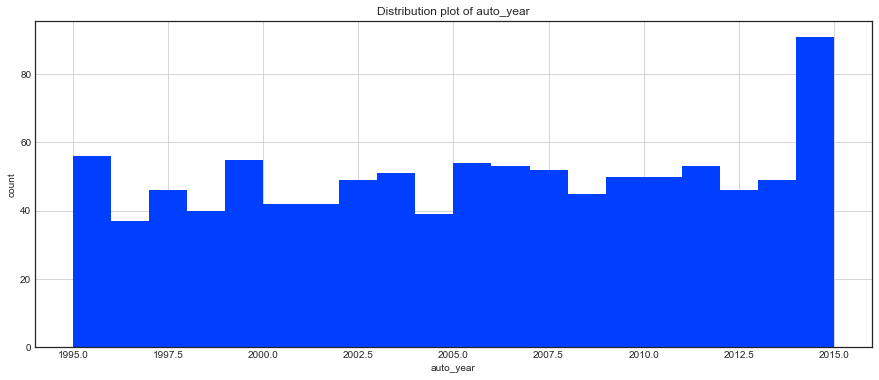

****************************************************************************************************


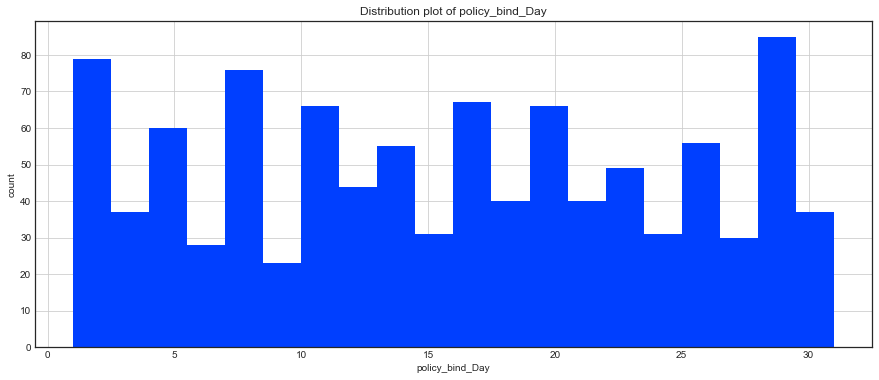

****************************************************************************************************


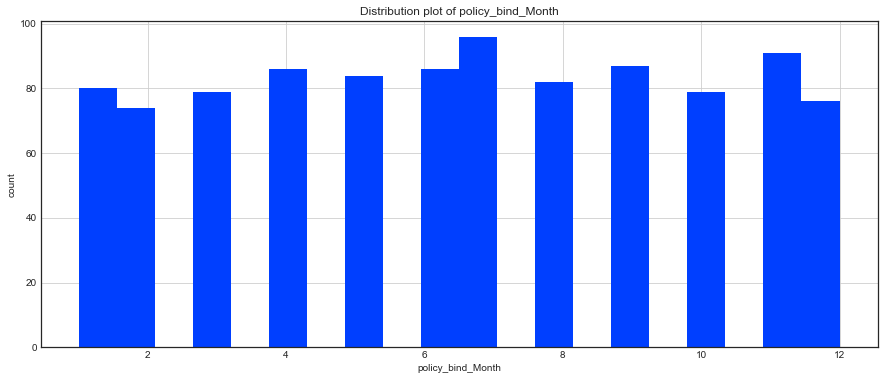

****************************************************************************************************


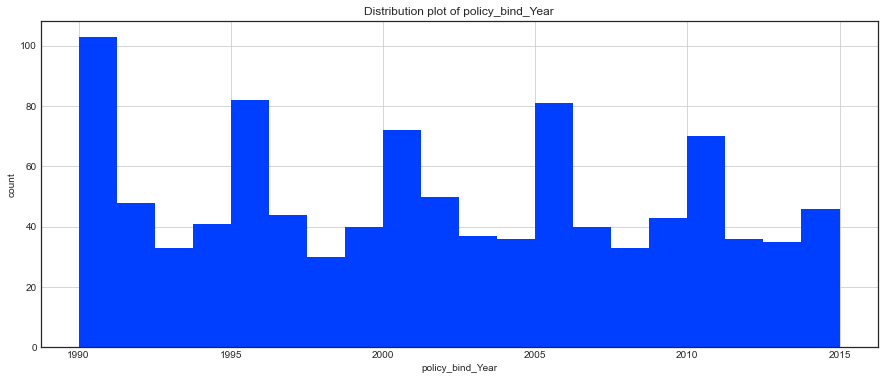

****************************************************************************************************


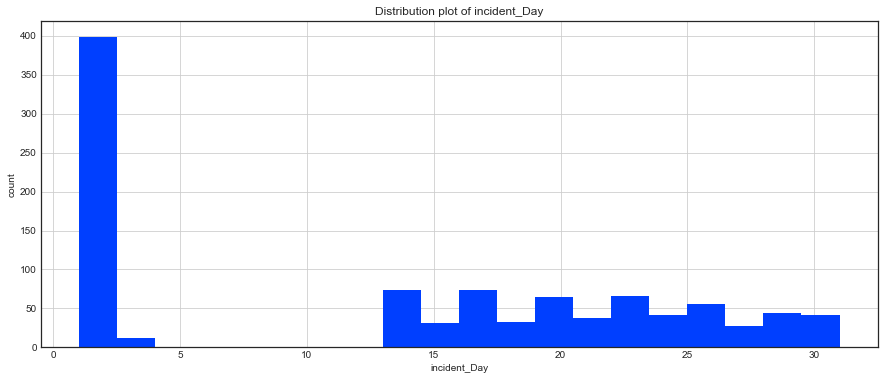

****************************************************************************************************


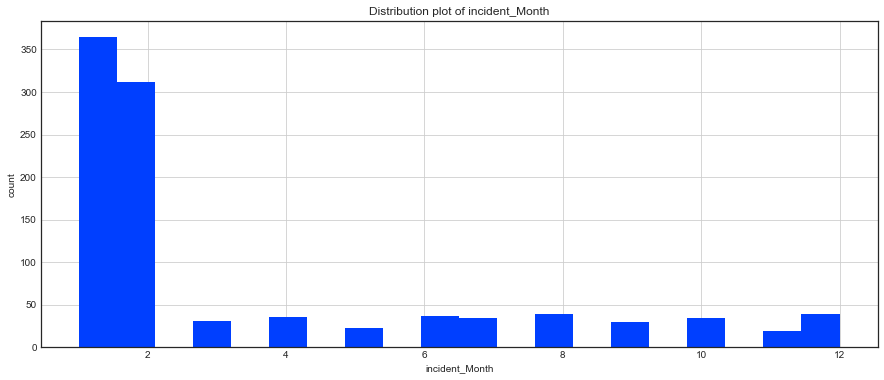

****************************************************************************************************


In [27]:
# plotting continuous feature variables
for column in df.columns:
    if (df[column].dtypes == 'int64') or (df[column].dtypes == 'float64'):
        plt.figure(figsize=(15,6))
        df[column].hist(bins=20)
        plt.xlabel(column)
        plt.ylabel('count')
        plt.title(f"Distribution plot of {column}")
        plt.show()
        print('*'*100)

From above plots we see how the data is distributed.And some here are some observations to make a note of:<br>
1. Age range 38-40 are more in number who apply .<br>
2. Total claim amount is highest between 60000-70000.<br>


# Encoding the Data

In [28]:
# using label encoder for target variable
le = LabelEncoder()
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   
1                      MD  machine-op-inspct         reading   
2                     PhD              sales     board-games   
3                     PhD       armed-forces     board-games   
4               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted incident_state  \
0   Side Collision      Major Damage                Police             SC   
1        Not-Known      Minor Damage                Police             VA   
2   Rear Collision      Minor Damage                Police             NY   
3  Front Collision      Major Damage                Police             OH   
4        Not-Known      Minor Damage                  None             NY   

  incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0      Columbus                         5                            1   
1     Riverwood                         8                            1   
2      Columbus                         7                            3   
3     Arlington                         5                            1   
4     Arlington                        20                            1   

  property_damage  bodily_injuries  witnesses police_report_available  \
0             YES                1          2                     YES   
1       Not-Known                0          0               Not-Known   
2              NO                2          3                      NO   
3       Not-Known                1          2                      NO   
4              NO                0          1                      NO   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       Saab   
1                5070           780             780           3510   Mercedes   
2               34650          7700            3850          23100      Dodge   
3               63400          6340            6340          50720  Chevrolet   
4                6500          1300             650           4550     Accura   

  auto_model  auto_year  fraud_reported  policy_bind_Day  policy_bind_Month  \
0        92x       2004               1               17                 10   
1       E400       2007               1               27                  6   
2        RAM       2007               0                9                  6   
3      Tahoe       2014               1               25                  5   
4        RSX       2009               0         

In [29]:
# getting list of all object data type column names
object_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_d.append(x)
print(f"Object Data Type Columns are:\n ",object_d)



Object Data Type Columns are:
  ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']


In [30]:
# using ordinal encoder for categorical feature variable.
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, object_d)
df.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48           2.0         1.0               1000   
1                 228   42           1.0         1.0               2000   
2                 134   29           2.0         0.0               2000   
3                 256   41           0.0         1.0               2000   
4                 228   44           0.0         2.0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132          1.0   
1                1197.22         5000000       468176          1.0   
2                1413.14         5000000       430632          0.0   
3                1415.74         6000000       608117          0.0   
4                1583.91         6000000       610706          1.0   

   insured_education_level  insured_occupation  insured_hobbies  \
0                      4.0                 2.0             17.0   
1                      4.0                 6.0             15.0   
2                      6.0                11.0              2.0   
3                      6.0                 1.0              2.0   
4                      0.0                11.0              2.0   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                   0.0          53300             0            2.0   
1                   2.0              0             0            3.0   
2                   3.0          35100             0            0.0   
3                   4.0          48900        -62400            2.0   
4                   4.0          66000        -46000            3.0   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0             3.0                0.0                    4.0             4.0   
1             1.0                1.0                    4.0             5.0   
2             2.0                1.0                    4.0             1.0   
3             0.0                0.0                    4.0             2.0   
4             1.0                1.0                    2.0             1.0   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0            1.0                         5                            1   
1            5.0                         8                            1   
2            1.0                         7                            3   
3            0.0                         5                            1   
4            0.0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0              2.0                1          2                      2.0   
1              1.0                0          0                      1.0   
2              0.0                2          3                      0.0   
3              1.0                1          2                      0.0   
4              0.0                0          1                      0.0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       10.0   
1                5070           780             780           3510        8.0   
2               34650          7700            3850          23100        4.0   
3               63400          6340            6340          50720        3.0   
4                6500          1300             650           4550        0.0   

   auto_model  auto_year  fraud_reported  policy_bind_Day  policy_bind_Month  \
0         1.0       2004               1               17                 10   
1        12.0       2007               1               27                  6   
2        30.0       2007               0                9                  6   
3        34.0       2014               1               25                  5   
4        31.0       2009             

In [31]:
print(f"Shape of our data frame post encoding is", df.shape)
df.isnull().sum()

Shape of our data frame post encoding is (1000, 40)


months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

With the help of shape and isnull method I am taking a look at our data frame values post applying the encoding technique on them. We see that there are no null values present in any of the columns above.

# Checking Outliers

In [32]:
# getting the list of all numeric data type column names
number_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_d.append(x)
print(f"\nNumber Data Type Columns are:\n ",number_d)


Number Data Type Columns are:
  ['months_as_customer', 'age', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'policy_bind_Day', 'policy_bind_Month', 'policy_bind_Year', 'incident_Day', 'incident_Month']


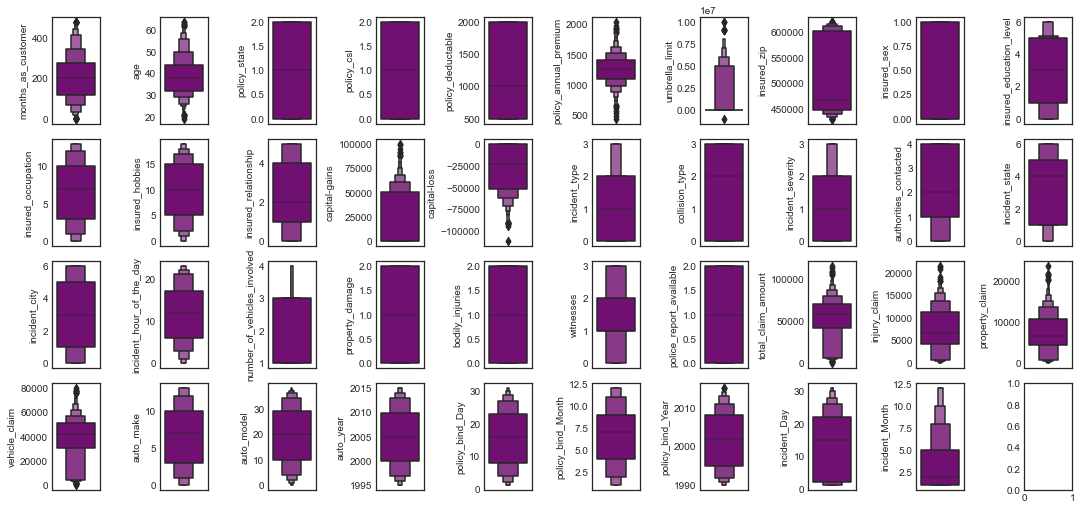

In [33]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=10, nrows=4, figsize=(15,7))
index = 0
ax = ax.flatten()
for col, value in df[number_d].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

We see that many features columns has outliers, like months_as_customer, age, injury_claim, policy_bind_month.etc



In [34]:
z = np.array(abs(zscore(df)))
threshold = 3
print(np.where(z>3))
df1_new=df[(z<3).all(axis=1)]
df1_new.head(10)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 29,  6,  6,  6,  5, 14,
        6,  6,  6], dtype=int64))


months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48           2.0         1.0               1000   
1                 228   42           1.0         1.0               2000   
2                 134   29           2.0         0.0               2000   
3                 256   41           0.0         1.0               2000   
4                 228   44           0.0         2.0               1000   
5                 256   39           2.0         1.0               1000   
6                 137   34           1.0         1.0               1000   
7                 165   37           0.0         0.0               1000   
8                  27   33           0.0         0.0                500   
9                 212   42           0.0         0.0                500   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132          1.0   
1                1197.22         5000000       468176          1.0   
2                1413.14         5000000       430632          0.0   
3                1415.74         6000000       608117          0.0   
4                1583.91         6000000       610706          1.0   
5                1351.10               0       478456          0.0   
6                1333.35               0       441716          1.0   
7                1137.03               0       603195          1.0   
8                1442.99               0       601734          0.0   
9                1315.68               0       600983          1.0   

   insured_education_level  insured_occupation  insured_hobbies  \
0                      4.0                 2.0             17.0   
1                      4.0                 6.0             15.0   
2                      6.0                11.0              2.0   
3                      6.0                 1.0              2.0   
4                      0.0                11.0              2.0   
5                      6.0                12.0              3.0   
6                      6.0                 9.0              2.0   
7                      0.0                12.0              0.0   
8                      6.0                 7.0              9.0   
9                      6.0                 8.0              4.0   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                   0.0          53300             0            2.0   
1                   2.0              0             0            3.0   
2                   3.0          35100             0            0.0   
3                   4.0          48900        -62400            2.0   
4                   4.0          66000        -46000            3.0   
5                   4.0              0             0            0.0   
6                   0.0              0        -77000            0.0   
7                   4.0              0             0            0.0   
8                   3.0              0             0            2.0   
9                   5.0              0        -39300            2.0   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0             3.0                0.0                    4.0             4.0   
1             1.0                1.0                    4.0             5.0   
2             2.0                1.0                    4.0             1.0   
3             0.0                0.0                    4.0             2.0   
4             1.0                1.0                    2.0             1.0   
5             2.0                0.0                    1.0             4.0   
6             0.0                1.0                    4.0             1.0   
7             0.0                2.0                    4.0             5.0   
8             0.0                2.0                    4.0             6.0   
9             2.0                2.0                    3.0             0.0   

   incident_city

In [35]:
print("Shape of old data",df.shape)
print("Shape of new data",df1_new.shape)

dataloss= ((1000-980)/1000)*100
print("PErcentage data loss is", dataloss)

Shape of old data (1000, 40)
Shape of new data (980, 40)
PErcentage data loss is 2.0


We have lost 2% data in removing outliers which is totally affordable

In [36]:
df = df1_new.copy()           # copying the updated data to old dataframe

# Checking Skewness

months_as_customer = 0.3620530752247592


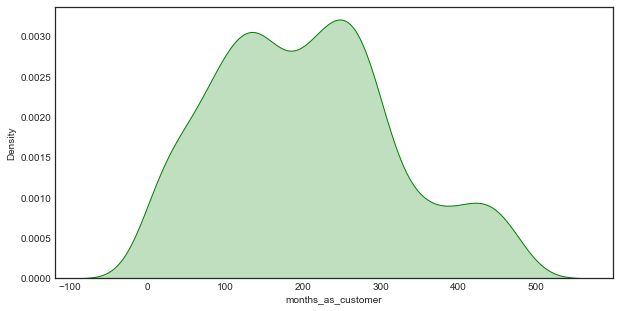

age = 0.47465708966054215


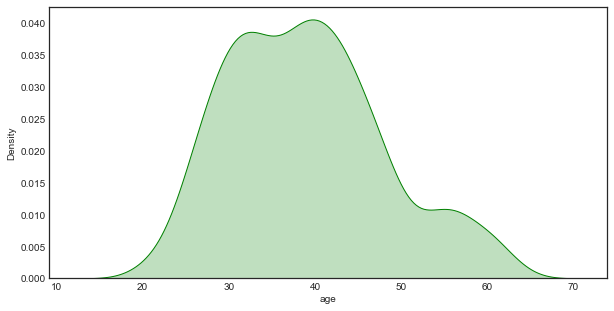

policy_state = -0.03809896962158549


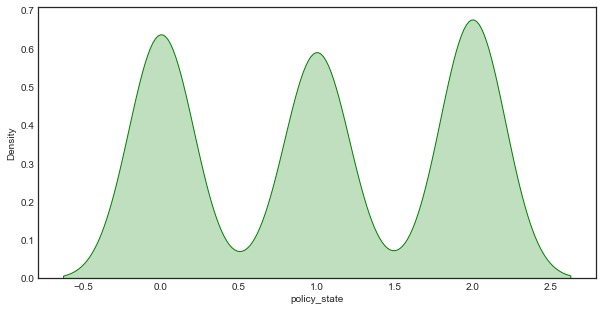

policy_csl = 0.09809770440149809


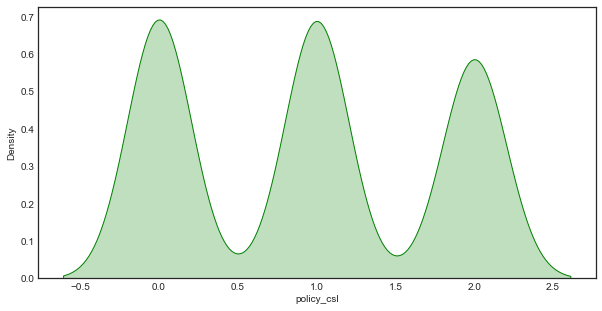

policy_deductable = 0.4753606366688163


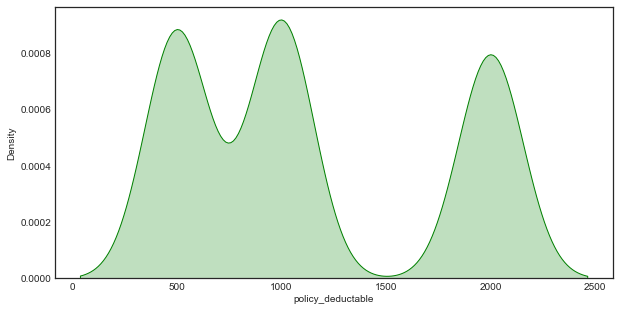

policy_annual_premium = 0.03590845835999718


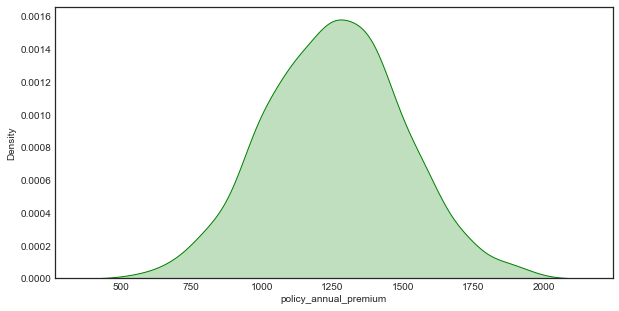

umbrella_limit = 1.7986651921722496


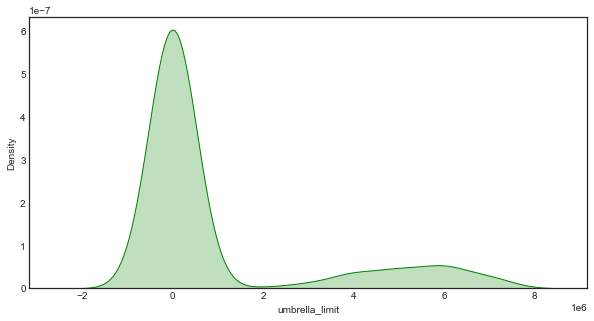

insured_zip = 0.8360012352593696


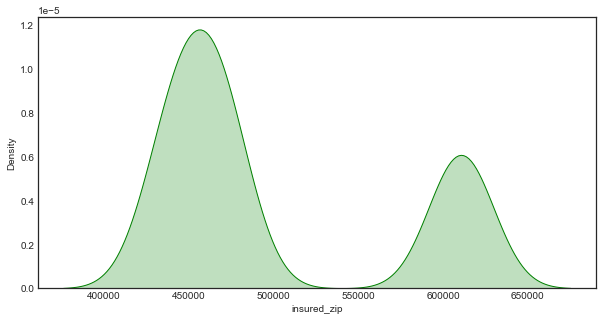

insured_sex = 0.1391107999083164


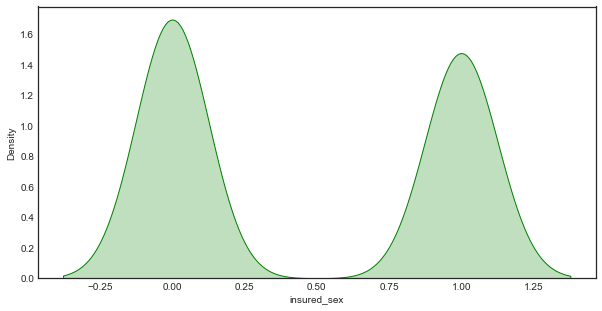

insured_education_level = 0.006276263009391841


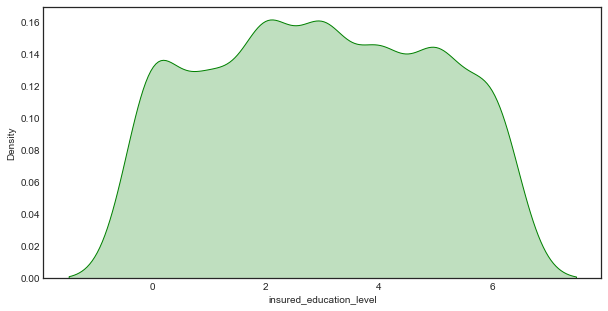

insured_occupation = -0.055274950065113744


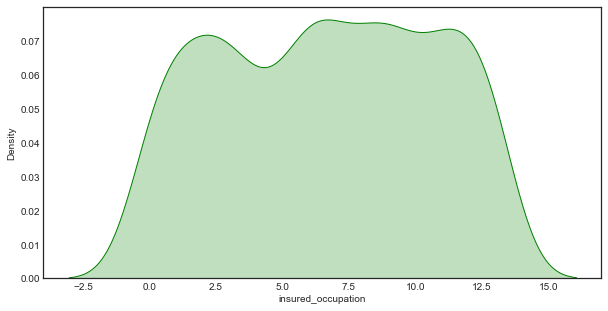

insured_hobbies = -0.06139365743310651


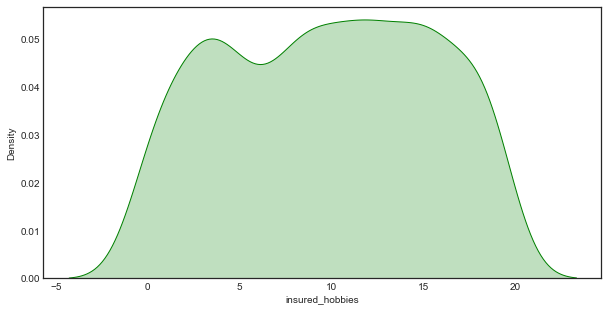

insured_relationship = 0.07821918743396004


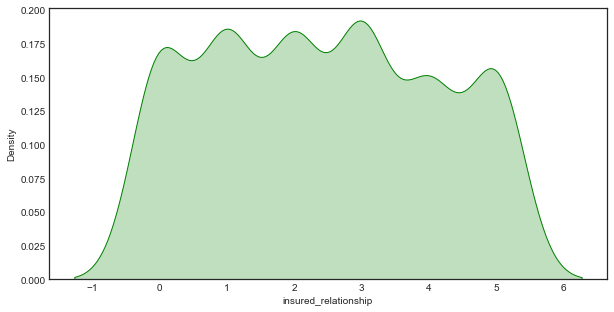

capital-gains = 0.46590435259700796


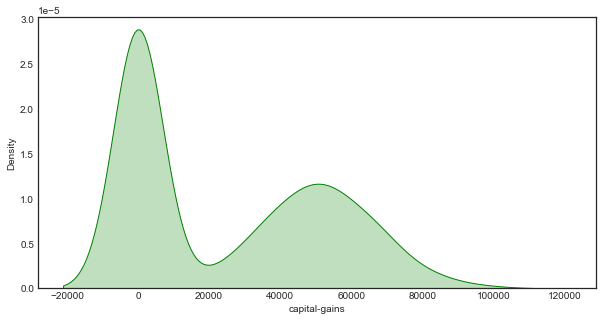

capital-loss = -0.37630716515558865


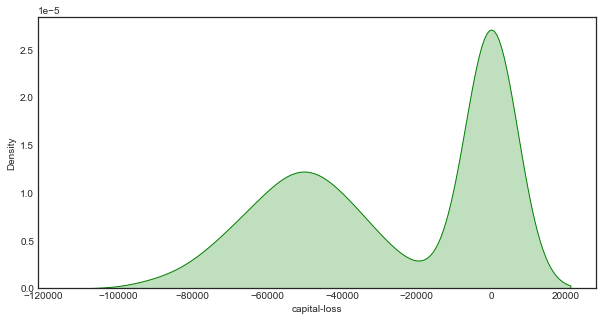

incident_type = 0.09042460962850381


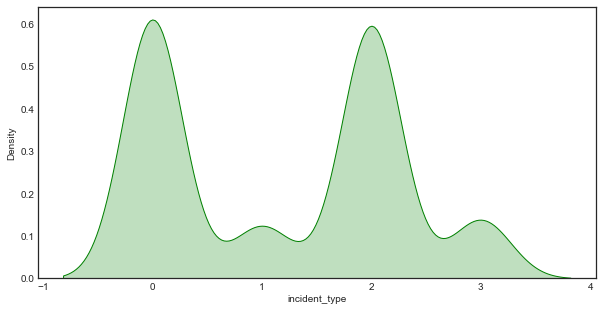

collision_type = -0.17821393896034957


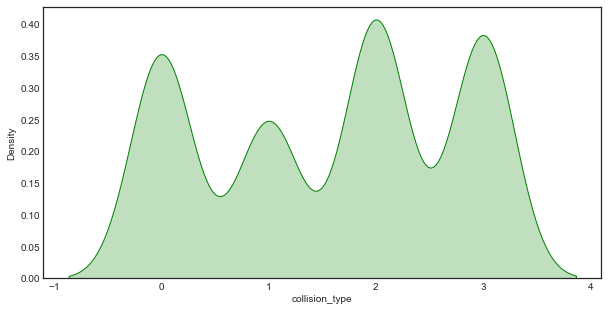

incident_severity = 0.2773009329674698


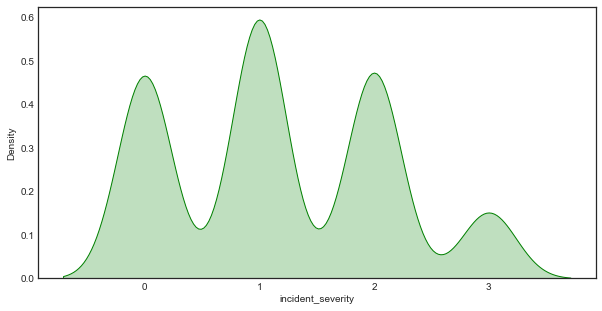

authorities_contacted = -0.11386962449061425


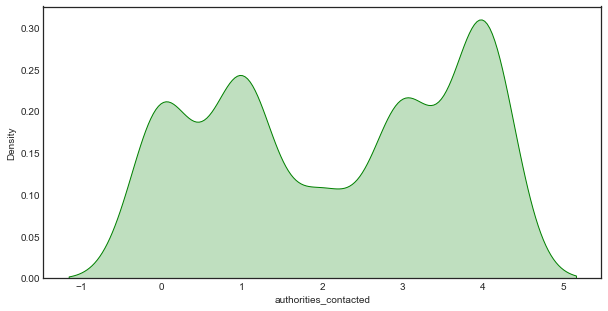

incident_state = -0.14902666589957952


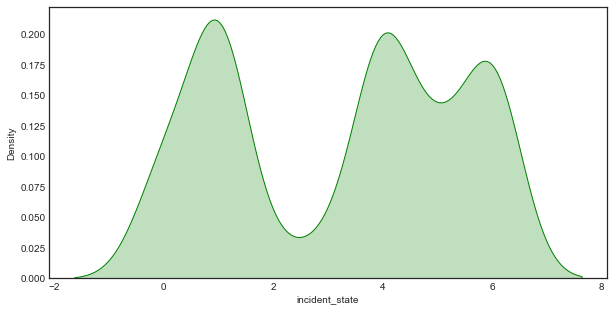

incident_city = 0.04381432764256542


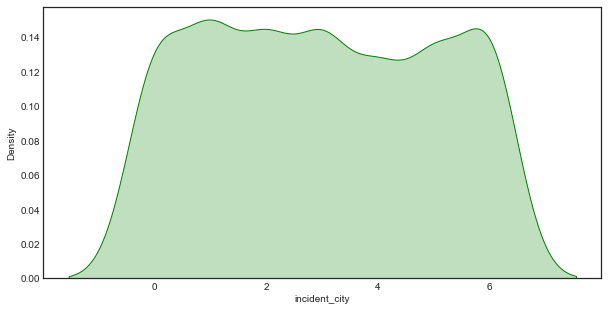

incident_hour_of_the_day = -0.03921968331735124


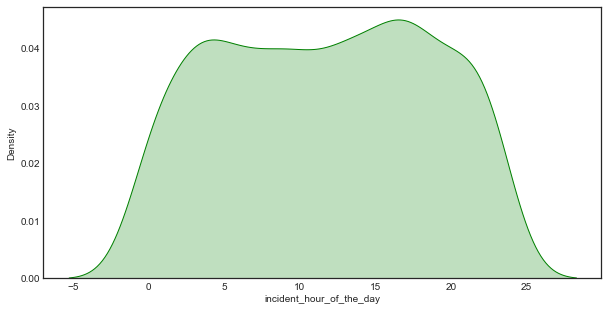

number_of_vehicles_involved = 0.508944175075505


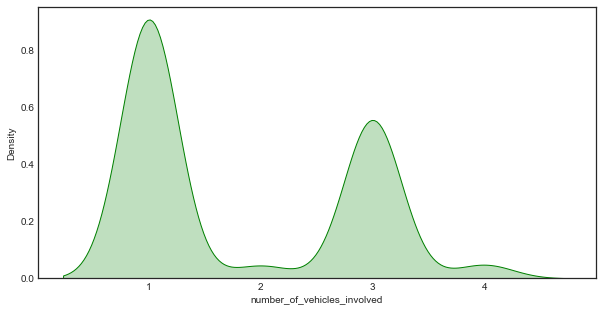

property_damage = 0.058728049831567895


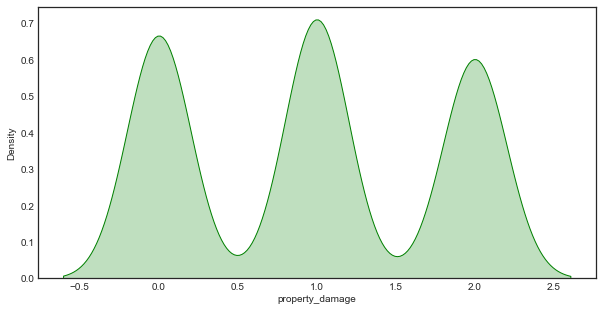

bodily_injuries = 0.0037511314089042377


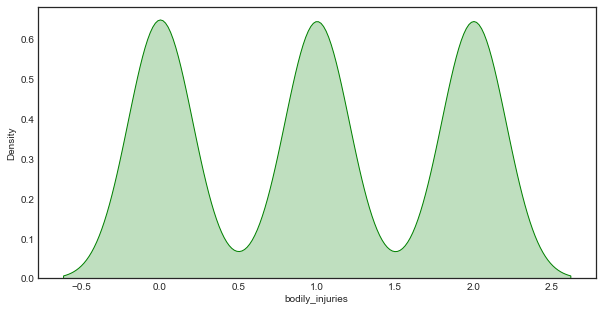

witnesses = 0.026170979709916217


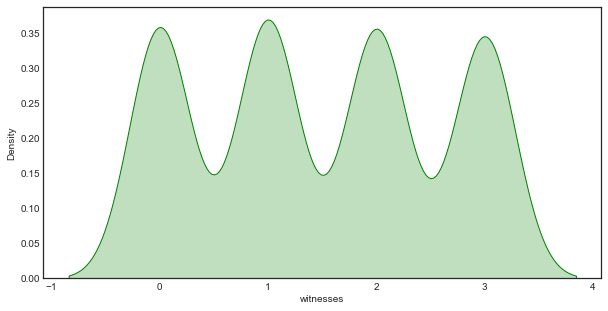

police_report_available = 0.05410535118545319


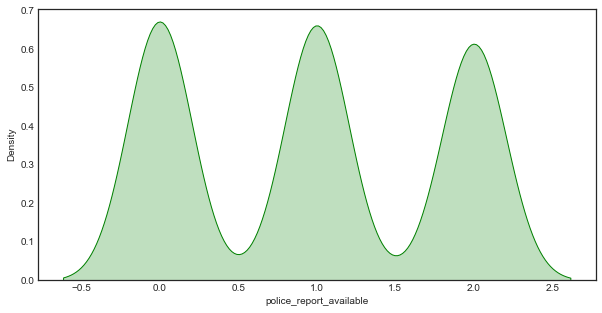

total_claim_amount = -0.5926843982192043


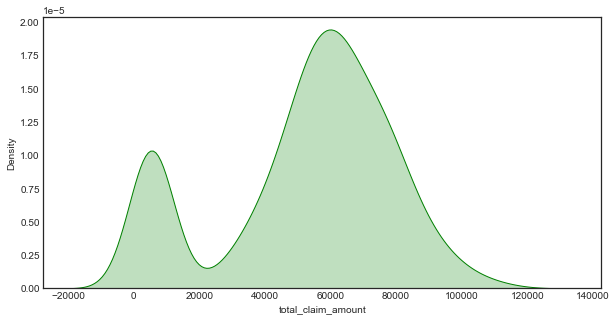

injury_claim = 0.27134328142736863


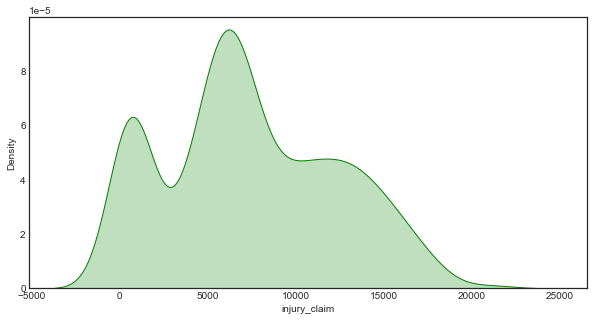

property_claim = 0.36080298262612875


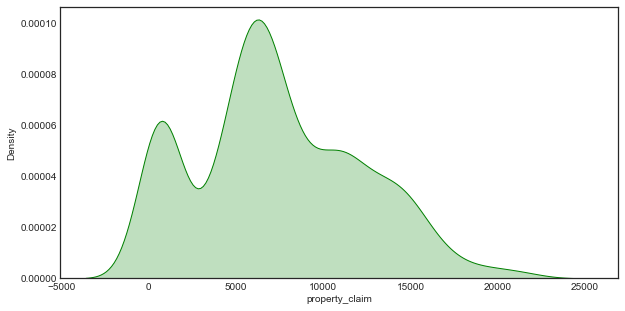

vehicle_claim = -0.6199846968999064


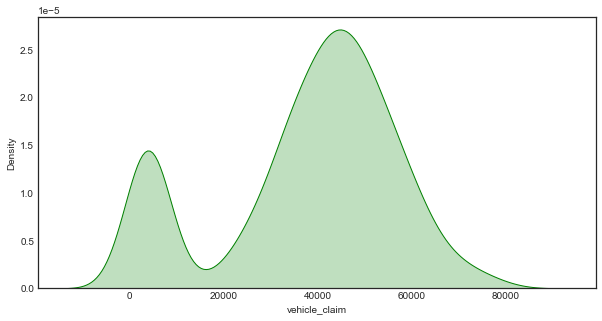

auto_make = -0.028695384577021876


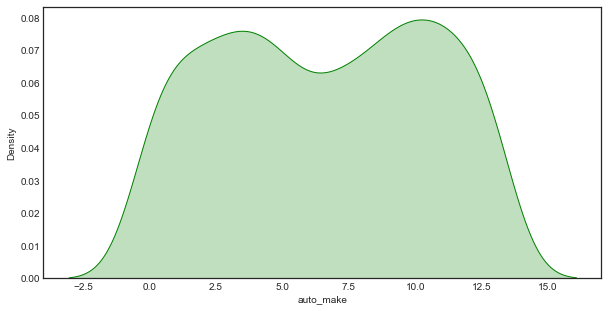

auto_model = -0.07334910988520747


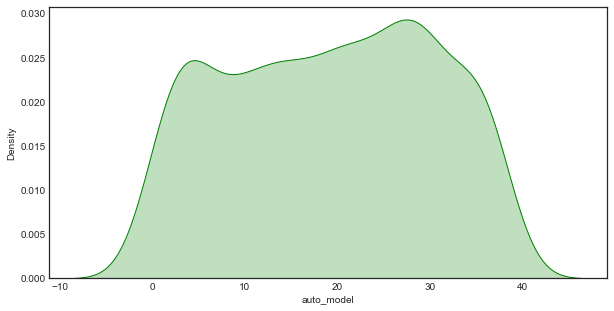

auto_year = -0.05443871767231271


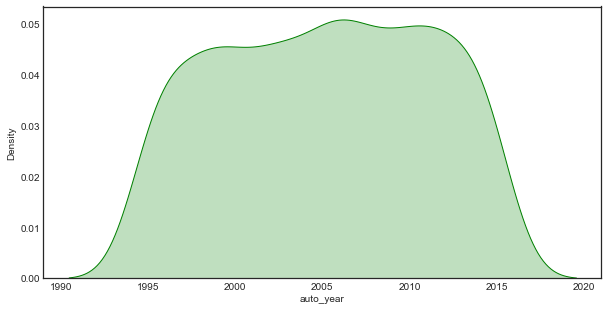

fraud_reported = 1.1864474946906238


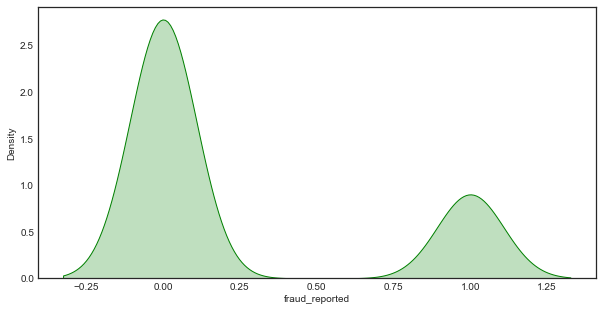

policy_bind_Day = 0.028108674634834675


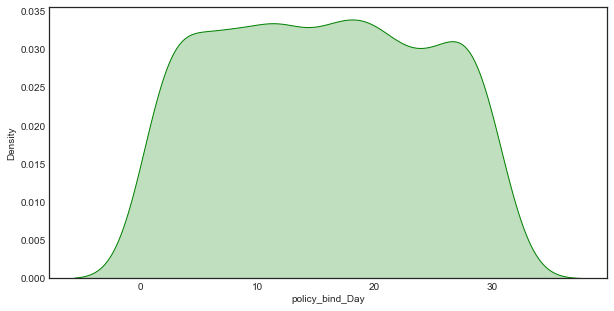

policy_bind_Month = -0.024605611390186626


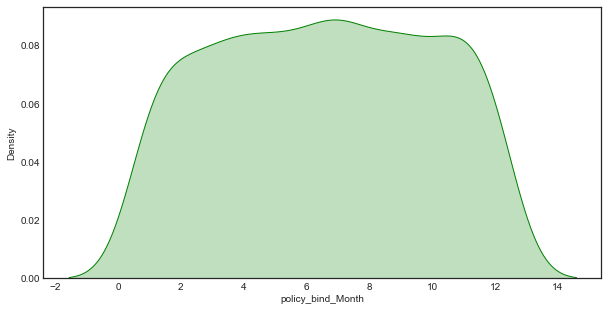

policy_bind_Year = 0.06492208812039993


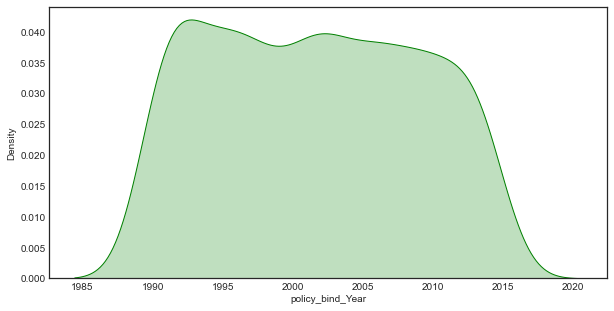

incident_Day = 0.0553579291982155


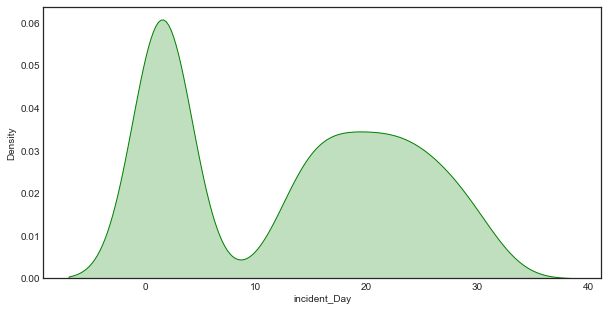

incident_Month = 1.3862105112063445


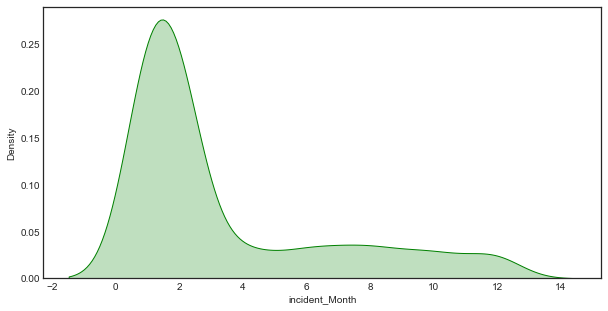

In [37]:
from scipy.stats import skew
for i in df:
    print(i, "=", skew(df[i]))
    plt.figure(figsize=(10,5))
    sns.distplot(df[i], kde = True, hist=False,color= 'green',kde_kws={"shade": True})
    plt.show(),

From above we see skewness is present in data columns such as umbrella_limit,incident_Month,insured_zip

# Splitting the dataframe in target and feature variable

In [38]:
x= df.drop('fraud_reported', axis=1)
y= df['fraud_reported']

In [39]:
x.skew().sort_values()

vehicle_claim                 -0.620936
total_claim_amount            -0.593593
capital-loss                  -0.376884
collision_type                -0.178487
incident_state                -0.149255
authorities_contacted         -0.114044
auto_model                    -0.073462
insured_hobbies               -0.061488
insured_occupation            -0.055360
auto_year                     -0.054522
incident_hour_of_the_day      -0.039280
policy_state                  -0.038157
auto_make                     -0.028739
policy_bind_Month             -0.024643
bodily_injuries                0.003757
insured_education_level        0.006286
witnesses                      0.026211
policy_bind_Day                0.028152
policy_annual_premium          0.035964
incident_city                  0.043882
police_report_available        0.054188
incident_Day                   0.055443
property_damage                0.058818
policy_bind_Year               0.065022
insured_relationship           0.078339


In [40]:
for col in x:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

Hence I have removed the skewness by using log transform.

# Correlation

In [41]:
df.corr()  

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007183   
age                                    0.922960  1.000000     -0.020012   
policy_state                          -0.007183 -0.020012      1.000000   
policy_csl                            -0.021855 -0.013323      0.001653   
policy_deductable                      0.031041  0.032036      0.017612   
policy_annual_premium                 -0.003814  0.005330      0.015089   
umbrella_limit                         0.005374 -0.003501     -0.005472   
insured_zip                            0.030130  0.035562      0.021429   
insured_sex                            0.059644  0.073790     -0.018002   
insured_education_level               -0.000731  0.001647     -0.027173   
insured_occupation                     0.006925  0.014798     -0.025357   
insured_hobbies                       -0.089358 -0.079099     -0.039501   
insured_relationship                   0.071492  0.076129     -0.017060   
capital-gains                          0.007468 -0.004529      0.068619   
capital-loss                           0.023041  0.012860     -0.031926   
incident_type                         -0.016746 -0.026286      0.032373   
collision_type                        -0.067778 -0.073156      0.053014   
incident_severity                     -0.064094 -0.064396     -0.028353   
authorities_contacted                  0.013782  0.018441     -0.014647   
incident_state                         0.015811  0.012644      0.019456   
incident_city                         -0.006601 -0.006685     -0.002809   
incident_hour_of_the_day               0.066198  0.083720      0.021926   
number_of_vehicles_involved            0.011831  0.020391     -0.045514   
property_damage                       -0.003499 -0.007206     -0.029727   
bodily_injuries                       -0.007674 -0.012254      0.012097   
witnesses                              0.063574  0.056360      0.025838   
police_report_available               -0.053957 -0.050485      0.040248   
total_claim_amount                     0.058761  0.067812     -0.014693   
injury_claim                           0.065062  0.077149     -0.048188   
property_claim                         0.036660  0.062375     -0.006420   
vehicle_claim                          0.055941  0.058918     -0.006411   
auto_make                              0.049734  0.033757      0.010259   
auto_model                             0.005130  0.015322     -0.018008   
auto_year                              0.000869  0.005594     -0.001160   
fraud_reported                         0.021285  0.013279      0.034587   
policy_bind_Day                        0.050824  0.053147     -0.000583   
policy_bind_Month                      0.004207  0.014492      0.073692   
policy_bind_Year                      -0.041914 -0.031709     -0.003045   
incident_Day                          -0.010538 -0.005843      0.016049   
incident_Month                         0.017973  0.016795      0.027597   

                             policy_csl  policy_deductable  \
months_as_customer            -0.021855           0.031041   
age                           -0.013323           0.032036   
policy_state                   0.001653           0.017612   
policy_csl                     1.000000           0.009912   
policy_deductable              0.009912           1.000000   
policy_annual_premium          0.032654          -0.008300   
umbrella_limit                 0.009524           0.000404   
insured_zip                    0.005630          -0.005521   
insured_sex                   -0.003405          -0.006977   
insured_education_level        0.008337           0.014101   
insured_occupation             0.016461          -0.053888   
insured_hobbies               -0.003695          -0.001923   
insured_relationship          -0.034603          -0.019000   
capital-gains                  0.009786           0.031673   
capital-loss           

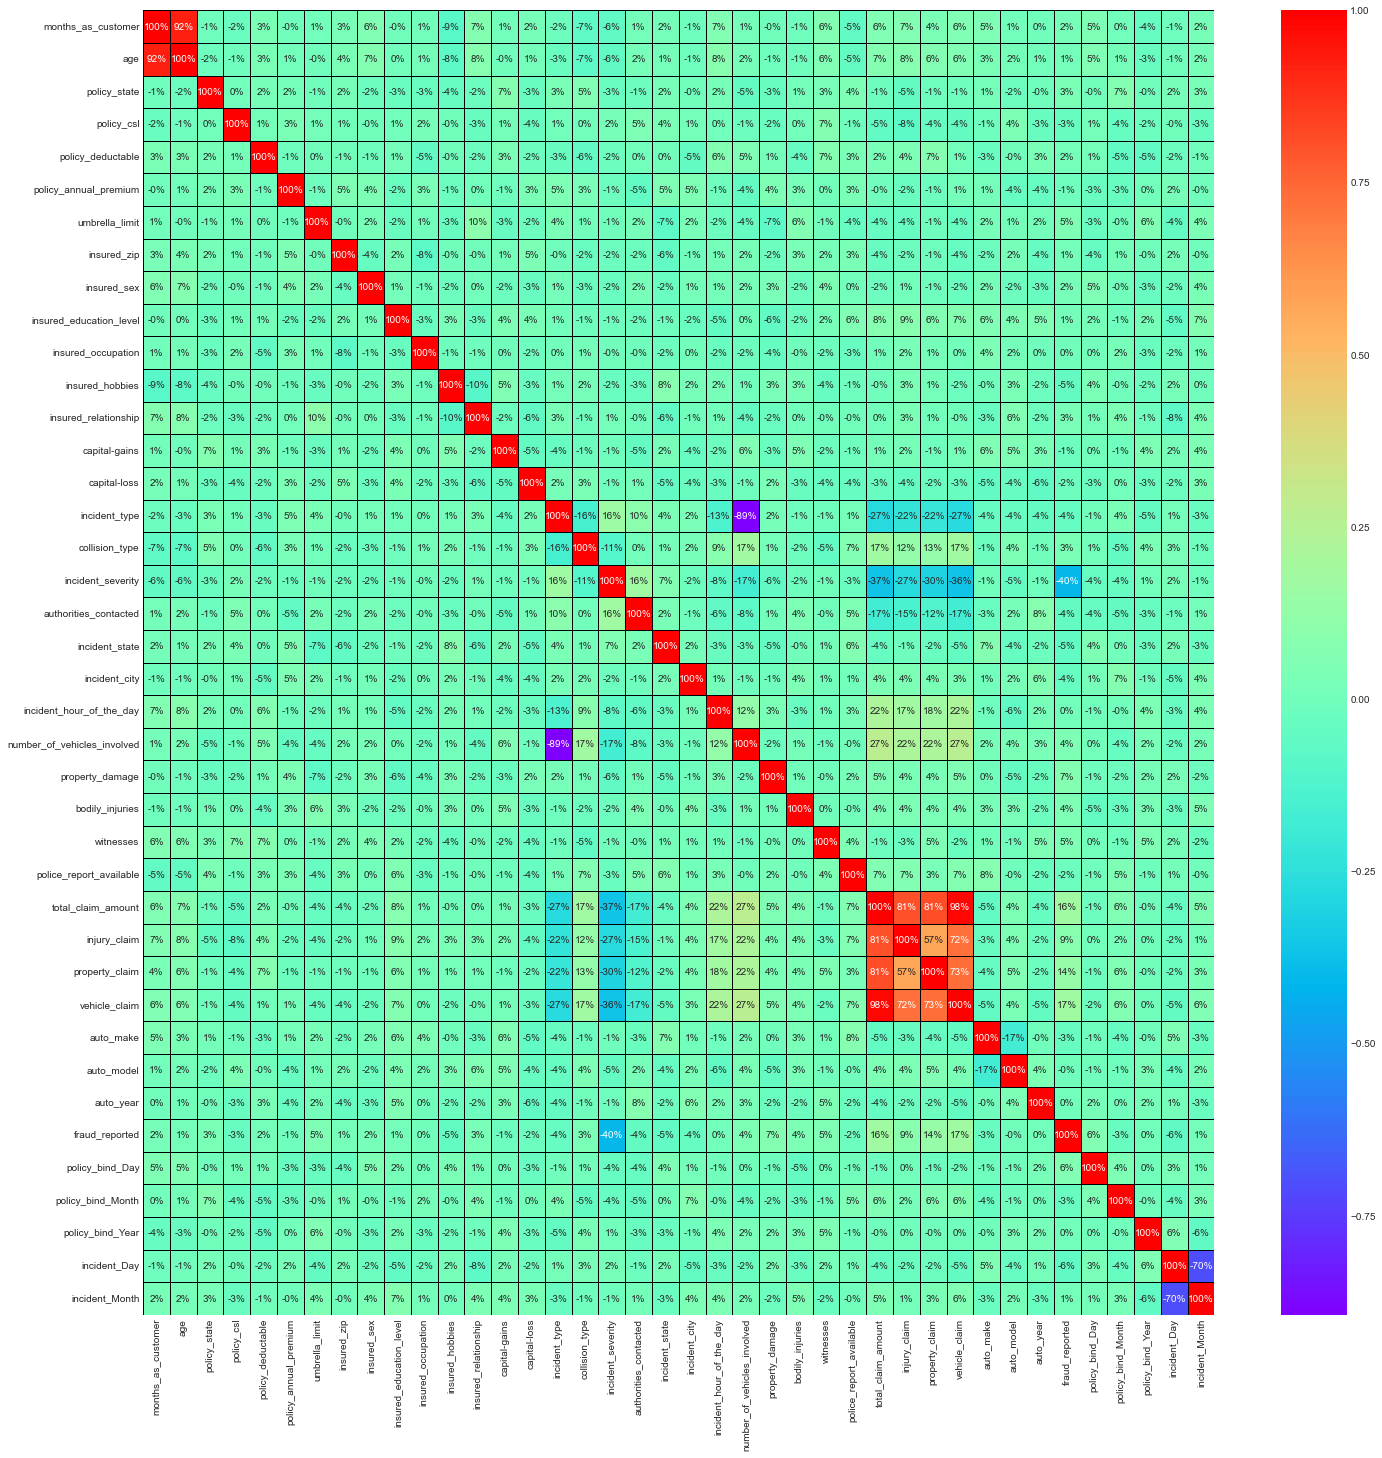

In [42]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(24,24))
sns.heatmap(df.corr() ,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

Observations<br>
1. We observe that incident_severity followed by vehicle_claim is highly correlated to our target variable.
2. We observe some multicollinearity between feature variables.  But they seem to add weightage over the label prediction therefore we shall retain them all.

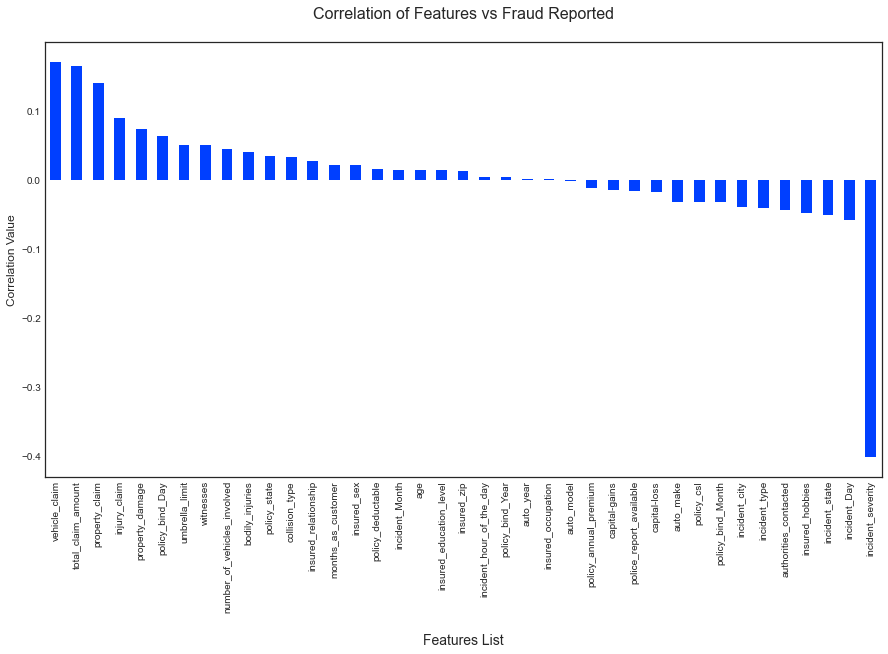

In [43]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs Fraud Reported\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Now in bar graph we can clearly see the correlation of all feature columns with the target variable.<br>
Inciddent_severity is negative and most correlated.<br>
Vehicle_claim, total_claim_amount, property_claim is highly and positively correlated.<br>

# Balancing the data using SMOTE

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

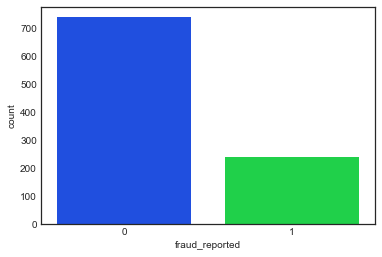

In [44]:
sns.countplot(y)

We can see our data is imbalanced. Lets balance it

In [45]:
sm = SMOTE()
x,y = sm.fit_resample(x, y)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

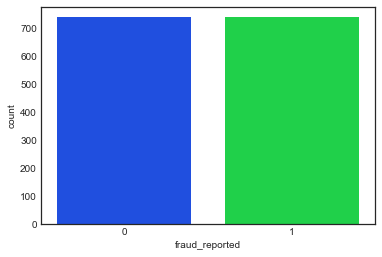

In [46]:
sns.countplot(y)

# Scaling the data

In [47]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

months_as_customer       age  policy_state  policy_csl  policy_deductable  \
0            1.108525  1.040084      1.211187    0.109158          -0.250968   
1            0.197870  0.357002     -0.070260    0.109158           1.462844   
2           -0.658145 -1.123007      1.211187   -1.222643           1.462844   
3            0.452854  0.243155     -1.351707    0.109158           1.462844   
4            0.197870  0.584696     -1.351707    1.440959          -0.250968   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0               0.682474       -0.494477    -0.500535     1.133473   
1              -0.245361        1.800309    -0.471498     1.133473   
2               0.710041        1.800309    -1.004850    -1.016370   
3               0.721545        2.259266     1.516511    -1.016370   
4               1.465663        2.259266     1.553290     1.133473   

   insured_education_level  insured_occupation  insured_hobbies  \
0                 0.538547           -1.220043         1.407500   
1                 0.538547           -0.168144         1.035191   
2                 1.619992            1.146729        -1.384813   
3                 1.619992           -1.483018        -1.384813   
4                -1.624344            1.146729        -1.384813   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0             -1.544209       1.059533      0.977034       0.871435   
1             -0.280512      -0.902649      0.977034       1.876296   
2              0.351337       0.389519      0.977034      -1.138285   
3              0.983185       0.897551     -1.324306       0.871435   
4              0.983185       1.527069     -0.719467       1.876296   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0        1.251917           -1.02833               1.314514        0.417294   
1       -0.597680            0.06059               1.314514        0.913216   
2        0.327119            0.06059               1.314514       -1.070472   
3       -1.522478           -1.02833               1.314514       -0.574550   
4       -0.597680            0.06059              -0.078076       -1.070472   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0      -1.010554                 -1.030827                    -0.817092   
1       1.087284                 -0.570238                    -0.817092   
2      -1.010554                 -0.723768                     1.286032   
3      -1.535014                 -1.030827                    -0.817092   
4      -1.535014                  1.272117                    -0.817092   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0         1.338381         0.153622   0.589850                 1.381133   
1        -0.018473        -1.116551  -1.312063                 0.062204   
2        -1.375327         1.423796   1.540807                -1.256726   
3        -0.018473         0.153622   0.589850                -1.256726   
4        -1.375327        -1.116551  -0.361106                -1.256726   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0            0.648431     -0.293550        1.115341       0.685775   0.942515   
1           -2.135905     -1.552263       -1.552527      -2.157248   0.408123   
2           -0.898143     -0.032141       -0.883380      -1.010556  -0.660660   
3            0.304887     -0.330894       -0.340652       0.606168  -0.927855   
4           -2.076067     -1.438034       -1.580862      -2.096372  -1.729442   

   auto_model  auto_year  policy_bind_Day  policy_bind_Month  \
0   -1.732816  -0.193296         0.176911           1.159707   
1   -0.677381   0.334848         1.377406          -0.100705   
2    1.049696   0.334848        -0.783485          -0.100705   
3    1.433491   1.567185         1.137307          -0.415808   
4    1.145645   0.686945        -1.143634          -0.100705   

   policy_bind_Year  i

# Checking Multicolinearity

In [48]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

variables    VIF FACTOR
0            months_as_customer  7.354624e+00
1                           age  7.346749e+00
2                  policy_state  1.056692e+00
3                    policy_csl  1.047280e+00
4             policy_deductable  1.060521e+00
5         policy_annual_premium  1.050012e+00
6                umbrella_limit  1.060569e+00
7                   insured_zip  1.073170e+00
8                   insured_sex  1.046684e+00
9       insured_education_level  1.067346e+00
10           insured_occupation  1.055161e+00
11              insured_hobbies  1.063198e+00
12         insured_relationship  1.071386e+00
13                capital-gains  1.071088e+00
14                 capital-loss  1.068519e+00
15                incident_type  4.661264e+00
16               collision_type  1.117822e+00
17            incident_severity  1.312681e+00
18        authorities_contacted  1.080266e+00
19               incident_state  1.066545e+00
20                incident_city  1.045947e+00
21     incident_hour_of_the_day  1.116943e+00
22  number_of_vehicles_involved  4.618441e+00
23              property_damage  1.044649e+00
24              bodily_injuries  1.065367e+00
25                    witnesses  1.073733e+00
26      police_report_available  1.070055e+00
27           total_claim_amount  2.169877e+09
28                 injury_claim  7.873505e+07
29               property_claim  7.997464e+07
30                vehicle_claim  1.108893e+09
31                    auto_make  1.087719e+00
32                   auto_model  1.076992e+00
33                    auto_year  1.056701e+00
34              policy_bind_Day  1.030551e+00
35            policy_bind_Month  1.072546e+00
36             policy_bind_Year  1.051691e+00
37                 incident_Day  1.821588e+00
38               incident_Month  1.841544e+00

All values of VIF factor are below 10 which is our permissible limit. So multicollinearity is not present

# Finding best random state for building our Classification Models

In [49]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 82.43243243243244 on Random State 233


Hence our random state is 233.

# Feature Importance Table

Importance
Features                               
incident_severity                 0.216
property_damage                   0.041
insured_hobbies                   0.037
vehicle_claim                     0.034
total_claim_amount                0.034
insured_sex                       0.032
policy_csl                        0.029
insured_zip                       0.029
injury_claim                      0.028
collision_type                    0.026
incident_state                    0.025
property_claim                    0.025
months_as_customer                0.024
insured_relationship              0.024
policy_annual_premium             0.023
authorities_contacted             0.022
auto_make                         0.020
insured_occupation                0.020
auto_model                        0.020
incident_hour_of_the_day          0.019
incident_Day                      0.019
incident_type                     0.019
incident_city                     0.018
age                               0.018
auto_year                         0.018
police_report_available           0.018
policy_bind_Year                  0.017
policy_bind_Month                 0.017
policy_bind_Day                   0.017
policy_state                      0.016
insured_education_level           0.014
capital-loss                      0.014
capital-gains                     0.011
number_of_vehicles_involved       0.011
policy_deductable                 0.010
incident_Month                    0.010
umbrella_limit                    0.009
witnesses                         0.009
bodily_injuries                   0.009

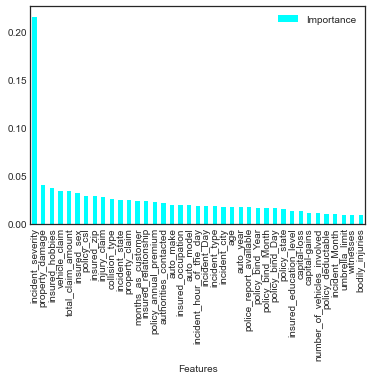

In [50]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

Here with the help of RandomForestClassifier we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=233)

# Training the Classification Model

LogisticRegression()
Accuracy Score of LogisticRegression() is: 78.91891891891892
Cross Validation Score are : [0.72169811 0.66509434 0.77358491 0.78672986 0.74881517 0.82938389
 0.79620853]
Cross Validation Score: 82.93838862559242
Accuracy Score - CV_Score -4.019469706673505
[[141  43]
 [ 35 151]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       184
           1       0.78      0.81      0.79       186

    accuracy                           0.79       370
   macro avg       0.79      0.79      0.79       370
weighted avg       0.79      0.79      0.79       370

AUC Score of  LogisticRegression() is 0.7890661524076671


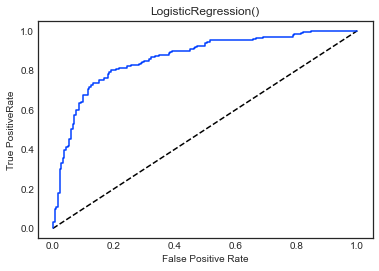



-------------------------------------------------------------------------------
GaussianNB()
Accuracy Score of GaussianNB() is: 79.45945945945945
Cross Validation Score are : [0.6745283  0.63207547 0.74528302 0.77725118 0.77725118 0.80094787
 0.81042654]
Cross Validation Score: 81.04265402843602
Accuracy Score - CV_Score -1.583194568976566
[[132  52]
 [ 24 162]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       184
           1       0.76      0.87      0.81       186

    accuracy                           0.79       370
   macro avg       0.80      0.79      0.79       370
weighted avg       0.80      0.79      0.79       370

AUC Score of  GaussianNB() is 0.7941795231416551


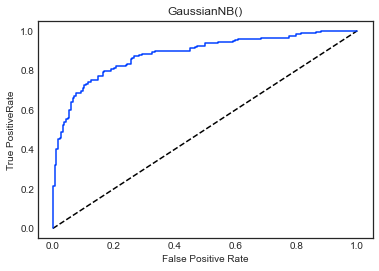



-------------------------------------------------------------------------------
DecisionTreeClassifier()
Accuracy Score of DecisionTreeClassifier() is: 82.43243243243244
Cross Validation Score are : [0.72169811 0.68396226 0.8254717  0.85781991 0.82464455 0.92890995
 0.85781991]
Cross Validation Score: 92.89099526066352
Accuracy Score - CV_Score -10.45856282823108
[[146  38]
 [ 27 159]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       184
           1       0.81      0.85      0.83       186

    accuracy                           0.82       370
   macro avg       0.83      0.82      0.82       370
weighted avg       0.83      0.82      0.82       370

AUC Score of  DecisionTreeClassifier() is 0.8241584852734923


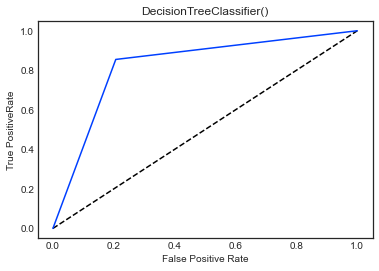



-------------------------------------------------------------------------------
KNeighborsClassifier()
Accuracy Score of KNeighborsClassifier() is: 64.32432432432432
Cross Validation Score are : [0.61792453 0.60377358 0.60849057 0.63507109 0.67772512 0.61611374
 0.63981043]
Cross Validation Score: 67.77251184834124
Accuracy Score - CV_Score -3.448187524016916
[[ 56 128]
 [  4 182]]
              precision    recall  f1-score   support

           0       0.93      0.30      0.46       184
           1       0.59      0.98      0.73       186

    accuracy                           0.64       370
   macro avg       0.76      0.64      0.60       370
weighted avg       0.76      0.64      0.60       370

AUC Score of  KNeighborsClassifier() is 0.6414212248714353


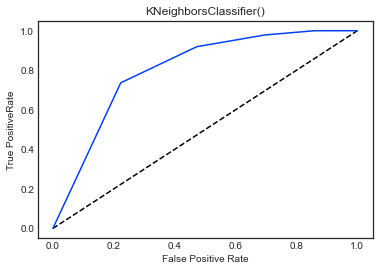



-------------------------------------------------------------------------------
RandomForestClassifier()
Accuracy Score of RandomForestClassifier() is: 88.64864864864866
Cross Validation Score are : [0.72641509 0.69339623 0.91509434 0.92890995 0.90995261 0.95260664
 0.92417062]
Cross Validation Score: 95.260663507109
Accuracy Score - CV_Score -6.612014858460341
[[165  19]
 [ 23 163]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       184
           1       0.90      0.88      0.89       186

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370

AUC Score of  RandomForestClassifier() is 0.886541608228144


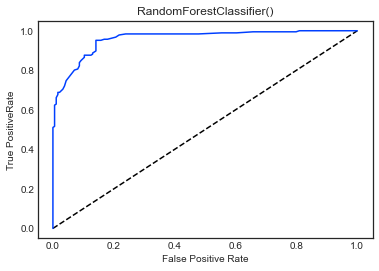



-------------------------------------------------------------------------------
SVC(kernel='poly', probability=True)
Accuracy Score of SVC(kernel='poly', probability=True) is: 83.51351351351352
Cross Validation Score are : [0.81603774 0.75943396 0.80660377 0.8436019  0.84834123 0.8436019
 0.86729858]
Cross Validation Score: 86.7298578199052
Accuracy Score - CV_Score -3.21634430639169
[[132  52]
 [  9 177]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       184
           1       0.77      0.95      0.85       186

    accuracy                           0.84       370
   macro avg       0.85      0.83      0.83       370
weighted avg       0.85      0.84      0.83       370

AUC Score of  SVC(kernel='poly', probability=True) is 0.8345021037868163


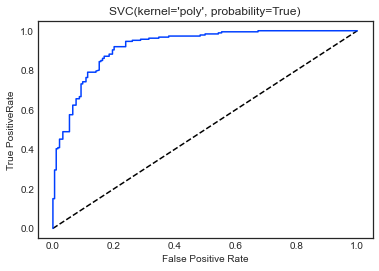



-------------------------------------------------------------------------------
ExtraTreesClassifier()
Accuracy Score of ExtraTreesClassifier() is: 89.45945945945945
Cross Validation Score are : [0.83962264 0.77830189 0.9009434  0.93838863 0.91469194 0.96682464
 0.9478673 ]
Cross Validation Score: 96.6824644549763
Accuracy Score - CV_Score -7.223004995516845
[[163  21]
 [ 18 168]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       184
           1       0.89      0.90      0.90       186

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370

AUC Score of  ExtraTreesClassifier() is 0.8945476858345022


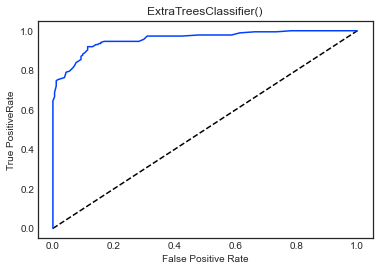



-------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=F

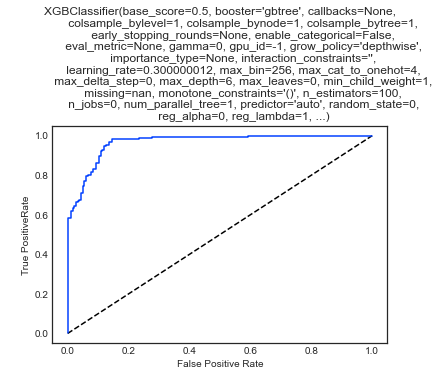



-------------------------------------------------------------------------------
LGBMClassifier()
Accuracy Score of LGBMClassifier() is: 90.0
Cross Validation Score are : [0.76886792 0.74056604 0.91037736 0.92417062 0.90995261 0.97156398
 0.92890995]
Cross Validation Score: 97.1563981042654
Accuracy Score - CV_Score -7.156398104265406
[[161  23]
 [ 14 172]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       184
           1       0.88      0.92      0.90       186

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370

AUC Score of  LGBMClassifier() is 0.8998655913978494


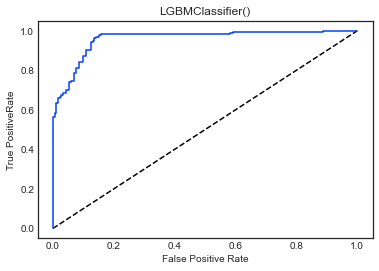



-------------------------------------------------------------------------------


In [52]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC(probability=True,kernel ='poly')
dtc =DecisionTreeClassifier()
knn= KNeighborsClassifier()
rfc= RandomForestClassifier()
etc = ExtraTreesClassifier()
xg= xgb.XGBClassifier(verbosity = 0)
LGBM = lgb.LGBMClassifier()

model=[lg,gnb,dtc,knn,rfc,svc,etc,xg,LGBM]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    #Calculating cross validation score
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
    
    a = max(cvs)
    cv_score=(a.mean())*100      # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that accuracy score of all models to be approx 100 %
    
    
    y_pred_prob = m.predict_proba(x_test)[:,-1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, m.predict(x_test))
    print(m)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,predm)*100)
    print("Cross Validation Score are :", cvs)
    print("Cross Validation Score:", cv_score)
    print("Accuracy Score - CV_Score", (accuracy_score(y_test,predm)*100)-(cv_score))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("AUC Score of ",m,"is",auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True PositiveRate")
    plt.title(m)
    plt.show()
    print('\n')
    print('-------------------------------------------------------------------------------')

Lets Prepare a Performance table

In [57]:
Performance_table = pd.DataFrame({"Model":['LR','GNB','DTC','KNC','RFC','SVC','ETC','XGB','LGBM'],
                                 "Accuracy_score":[78.91,79.45,82.43,64.32,88.64,83.51,89.45,90.81,90.0],
                                 "Cv Score":[82.93,81.04,92.89,67.77,95.26,86.72,96.68,96.20,97.15],
                                 "Result":[-4.01,-1.58,-10.45,-3.44,-6.61,-3.21,-7.22,-5.39,-7.15],
                                 "AUC Score":[0.78,0.79,0.82,0.64,0.88,0.83,0.89,0.90,0.89]})

Performance_table

Model  Accuracy_score  Cv Score  Result  AUC Score
0    LR           78.91     82.93   -4.01       0.78
1   GNB           79.45     81.04   -1.58       0.79
2   DTC           82.43     92.89  -10.45       0.82
3   KNC           64.32     67.77   -3.44       0.64
4   RFC           88.64     95.26   -6.61       0.88
5   SVC           83.51     86.72   -3.21       0.83
6   ETC           89.45     96.68   -7.22       0.89
7   XGB           90.81     96.20   -5.39       0.90
8  LGBM           90.00     97.15   -7.15       0.89

As can be seen from above table,XGB, ETC are giving good results. But I will chose XGB as it is giving less differece and good AUC score.

# Hypertuning 

In [58]:
# choosing XGB

param = { 'normalize_type':['tree','forest'],
            'max_depth' : [30, 40, 50],
            'max_delta_step':[1,2,3]
             }

In [63]:
GCV = GridSearchCV(xgb.XGBClassifier(), param, cv=7)


In [64]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=7,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'max_delta_step': [1, 2, 3], 'max_depth': [30, 40, 50],
                         'normalize_type': ['tree', 'forest']})

In [65]:
GCV.best_params_

{'max_delta_step': 1, 'max_depth': 30, 'normalize_type': 'tree'}

In [66]:
GCV.best_score_

0.8918762154969464

# Final Model

In [67]:
final_model = xgb.XGBClassifier(normalize_type='tree',max_depth = 30,max_delta_step=1)

Classifier = final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 91.35135135135135


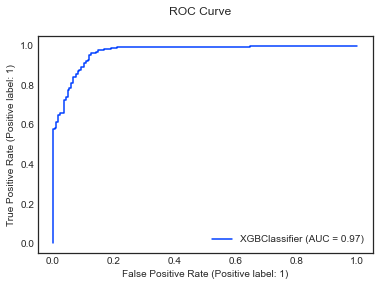

In [68]:
# visualization of final model
roc = metrics.plot_roc_curve(final_model, x_test, y_test)
roc.figure_.suptitle("ROC Curve")
plt.show()

Hence, after hypertuning we get 91% accuracy and AUC score is 97%

# Confusion Matrix

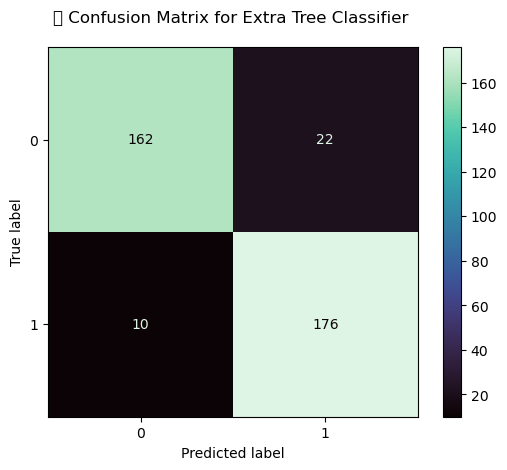

In [69]:
plt.style.use('default')

class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Tree Classifier \n')
plt.show()


Here Black box depicts how many time my model has not given correct predictions, whereas other two boxes gives the number of times model has predicted correctly.

# Saving the Model

In [70]:
filename = "InsuranceFraud_E09.pkl"
joblib.dump(final_model, filename)

['InsuranceFraud_E09.pkl']

Saving the model

# Thank you for evaluating my project